In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec
import matplotlib.cm as cm
import warnings
import os.path as osp
from mpl_toolkits import mplot3d

warnings.filterwarnings(action='once')
print(sns.__version__, pd.__version__, np.__version__)

0.8.1 0.23.0 1.14.3


In [2]:
def draw_corr_matrix(X, out_path, name):
    fig = plt.figure(figsize=(9,7))
    cov = np.corrcoef(X.T)
    sns.heatmap(cov);
    plt.title('correlation matrix')
    plt.savefig(osp.join(out_path, 'corr_matrix_trajectory_{}.png'.format(name)), format='png')
    plt.show()
    plt.close()

In [49]:
def draw_trajectory(X, out_path, name):
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')
    ax.plot3D(X[:, 0], X[:, 1], X[:, 2], 'grey');
    ax.scatter3D(X[0, 0], X[0, 1], X[0, 2], color='green', marker='^', s=120, label='start');
    ax.scatter3D(X[-1, 0], X[-1, 1], X[-1, 2], color='darkred', marker='o', s=120, label='end');
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.legend()
    plt.savefig(osp.join(out_path, 'trajectory_{}.png'.format(name)), format='png')
    plt.show()
    plt.close()

In [38]:
def draw_jointplot(X, out_path, name):
    num_samples, num_channels = X.shape
    colors = cm.viridis(np.linspace(0, 1, num_channels))
    fig = plt.figure(figsize=(20, 5*num_channels))

    for idx in range(num_channels):
        x = idx % num_channels
        y = idx % 1
        gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
        ax0 = plt.subplot(gs[x, y])
        plt.xlabel('time')
        plt.ylabel('distance')
        ax0.plot(t, X[:, idx], color=colors[idx])

        ax1 = plt.subplot(gs[x, y+1])
        vert_hist = np.histogram(X[:, idx])
        sns.distplot(X[:, idx], ax=ax1, vertical=True, hist_kws={"color": colors[idx]}, kde_kws={"color": colors[idx], "lw": 3})
        plt.xlabel('frequency')
    plt.tight_layout()
    plt.savefig(osp.join(out_path, 'timeseries_channels_trajectory_{}.png'.format(name)), format='png')
    plt.show()
    plt.close()

300 9
(300, 9) (300, 3)


/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:219: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


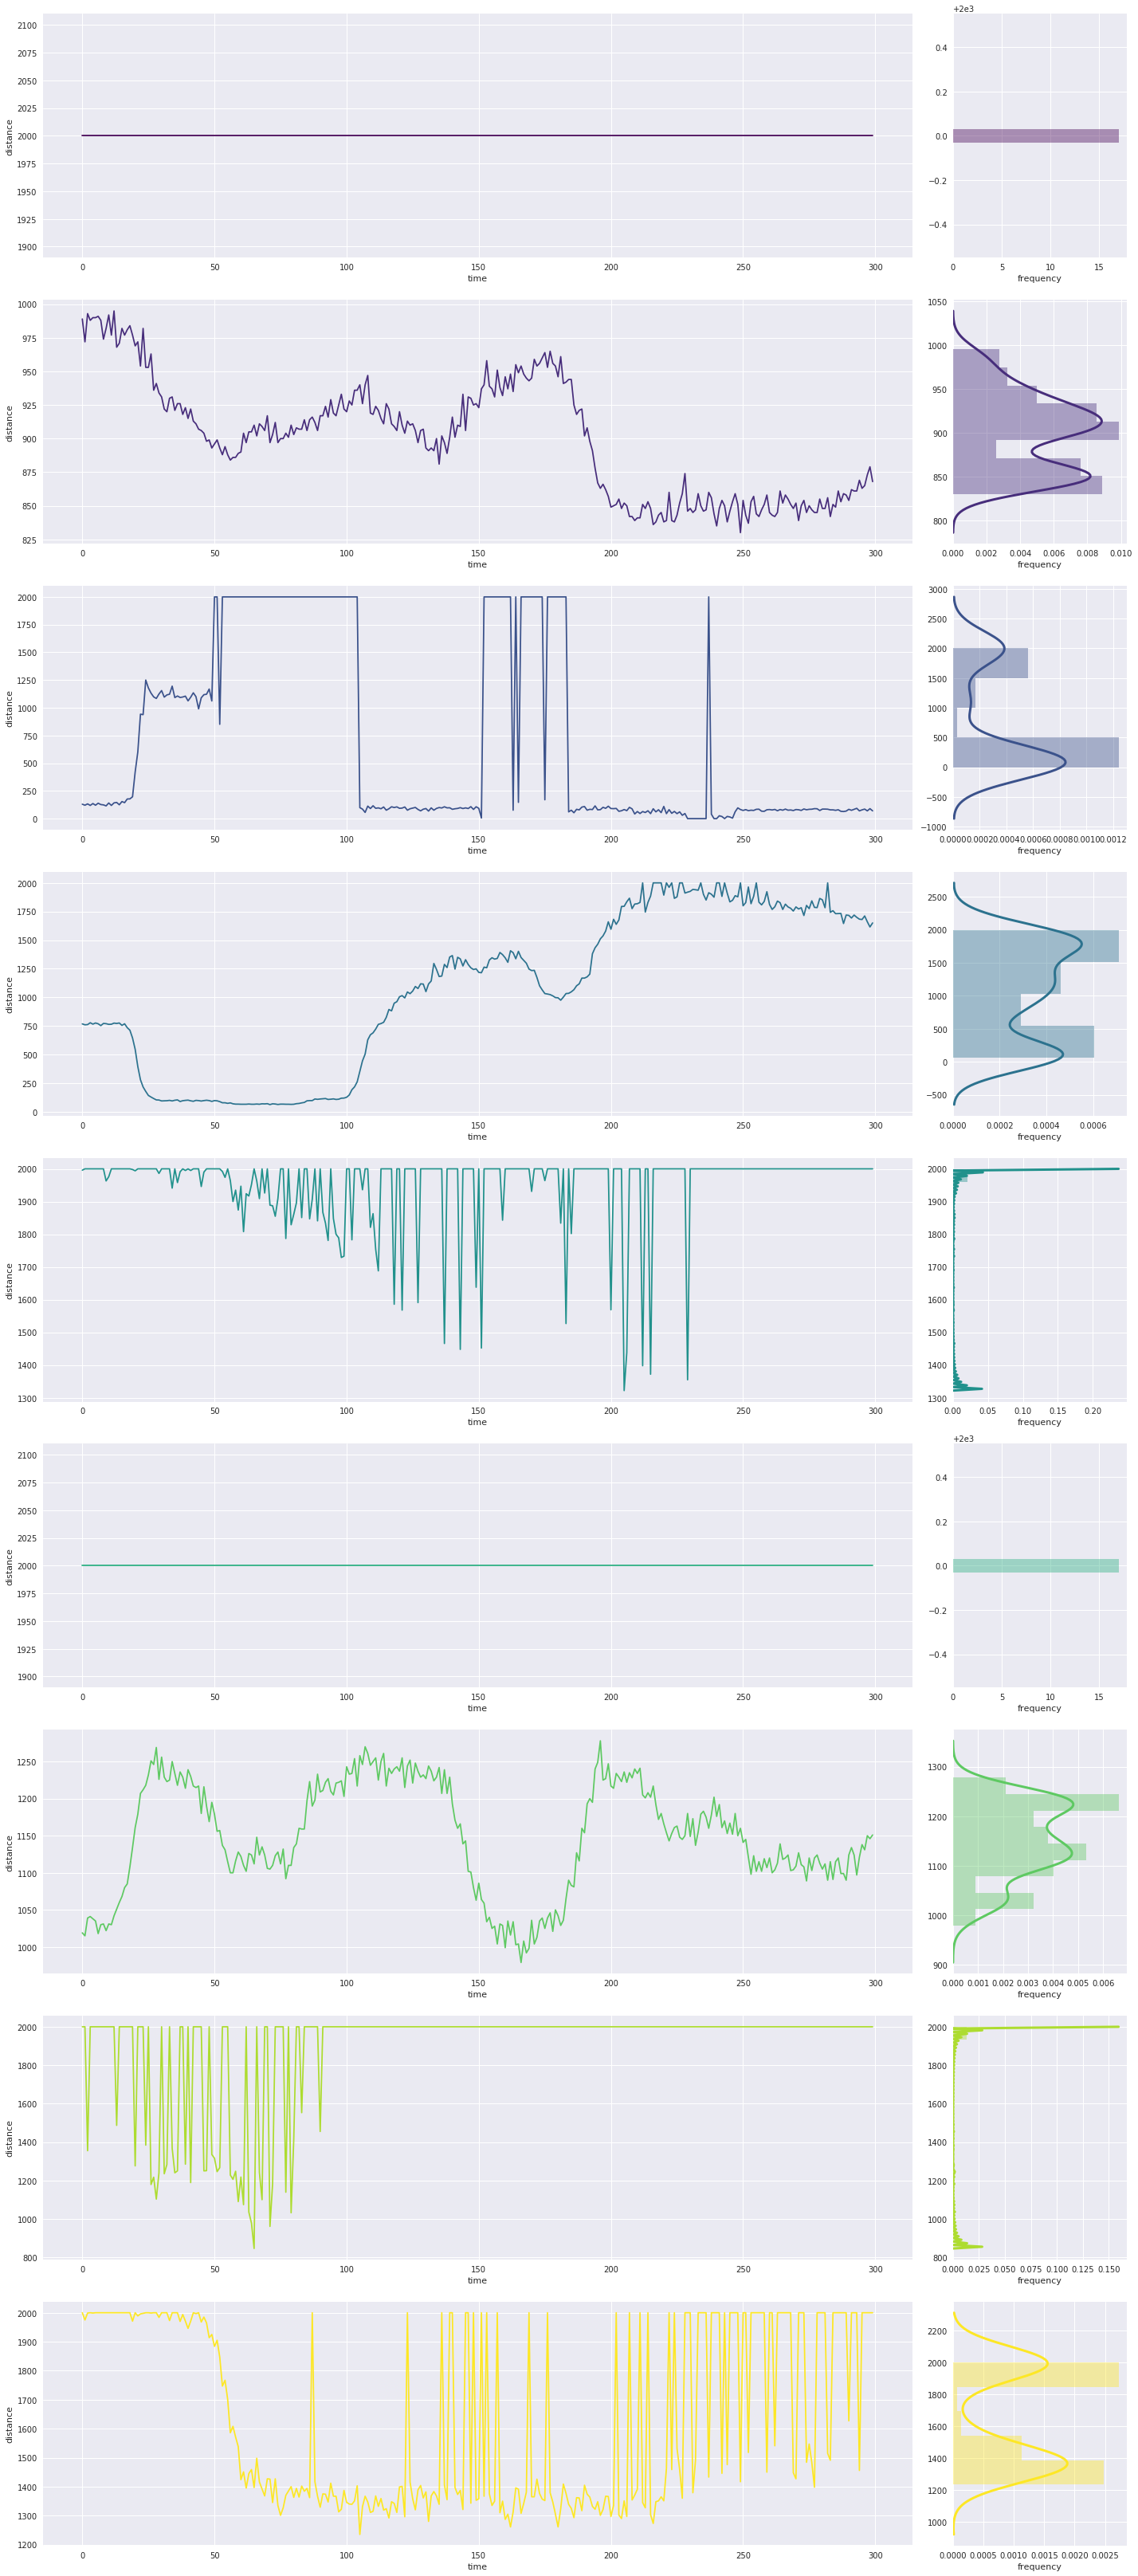

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


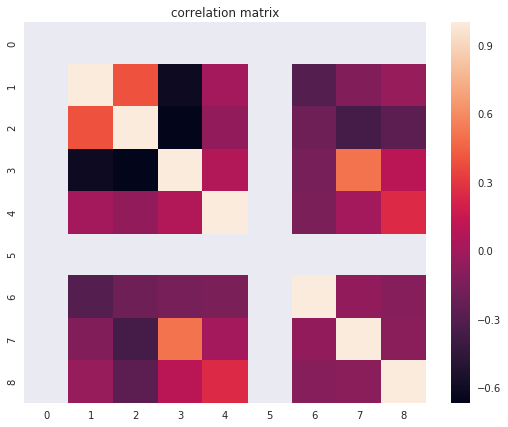

In [54]:
### TESTING...
idx_trajectory = 0
# trajectory = trajectory[-300:, :]
# np.save('random_data/trajectory{}.npy'.format(idx_trajectory), trajectory)
min_depth, max_depth = 0.05, 2000
raw = np.load('random_data/lidar_{}.npy'.format(idx_trajectory))
num_samples, num_channels = raw.shape
print(num_samples, num_channels)
X = raw[:, :]
# clip to min and max
X[X >= max_depth] = max_depth
X[X <= min_depth] = min_depth
t = np.arange(num_samples)
trajectory = np.load('random_data/trajectory{}.npy'.format(idx_trajectory))
print(X.shape, trajectory.shape)
draw_jointplot(X, out_path='experiments/03_visualize_channels', name=idx_trajectory)
draw_corr_matrix(X, out_path='experiments/03_visualize_channels', name=idx_trajectory)

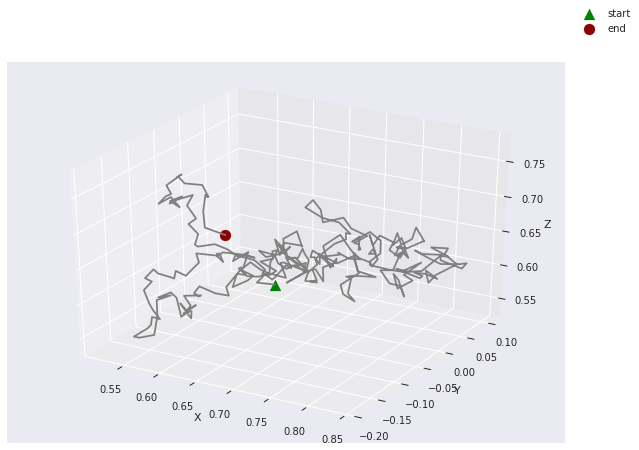

In [50]:
draw_trajectory(trajectory, out_path='experiments/03_visualize_channels', name=idx_trajectory)

(300, 9) (300, 3)


/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:219: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


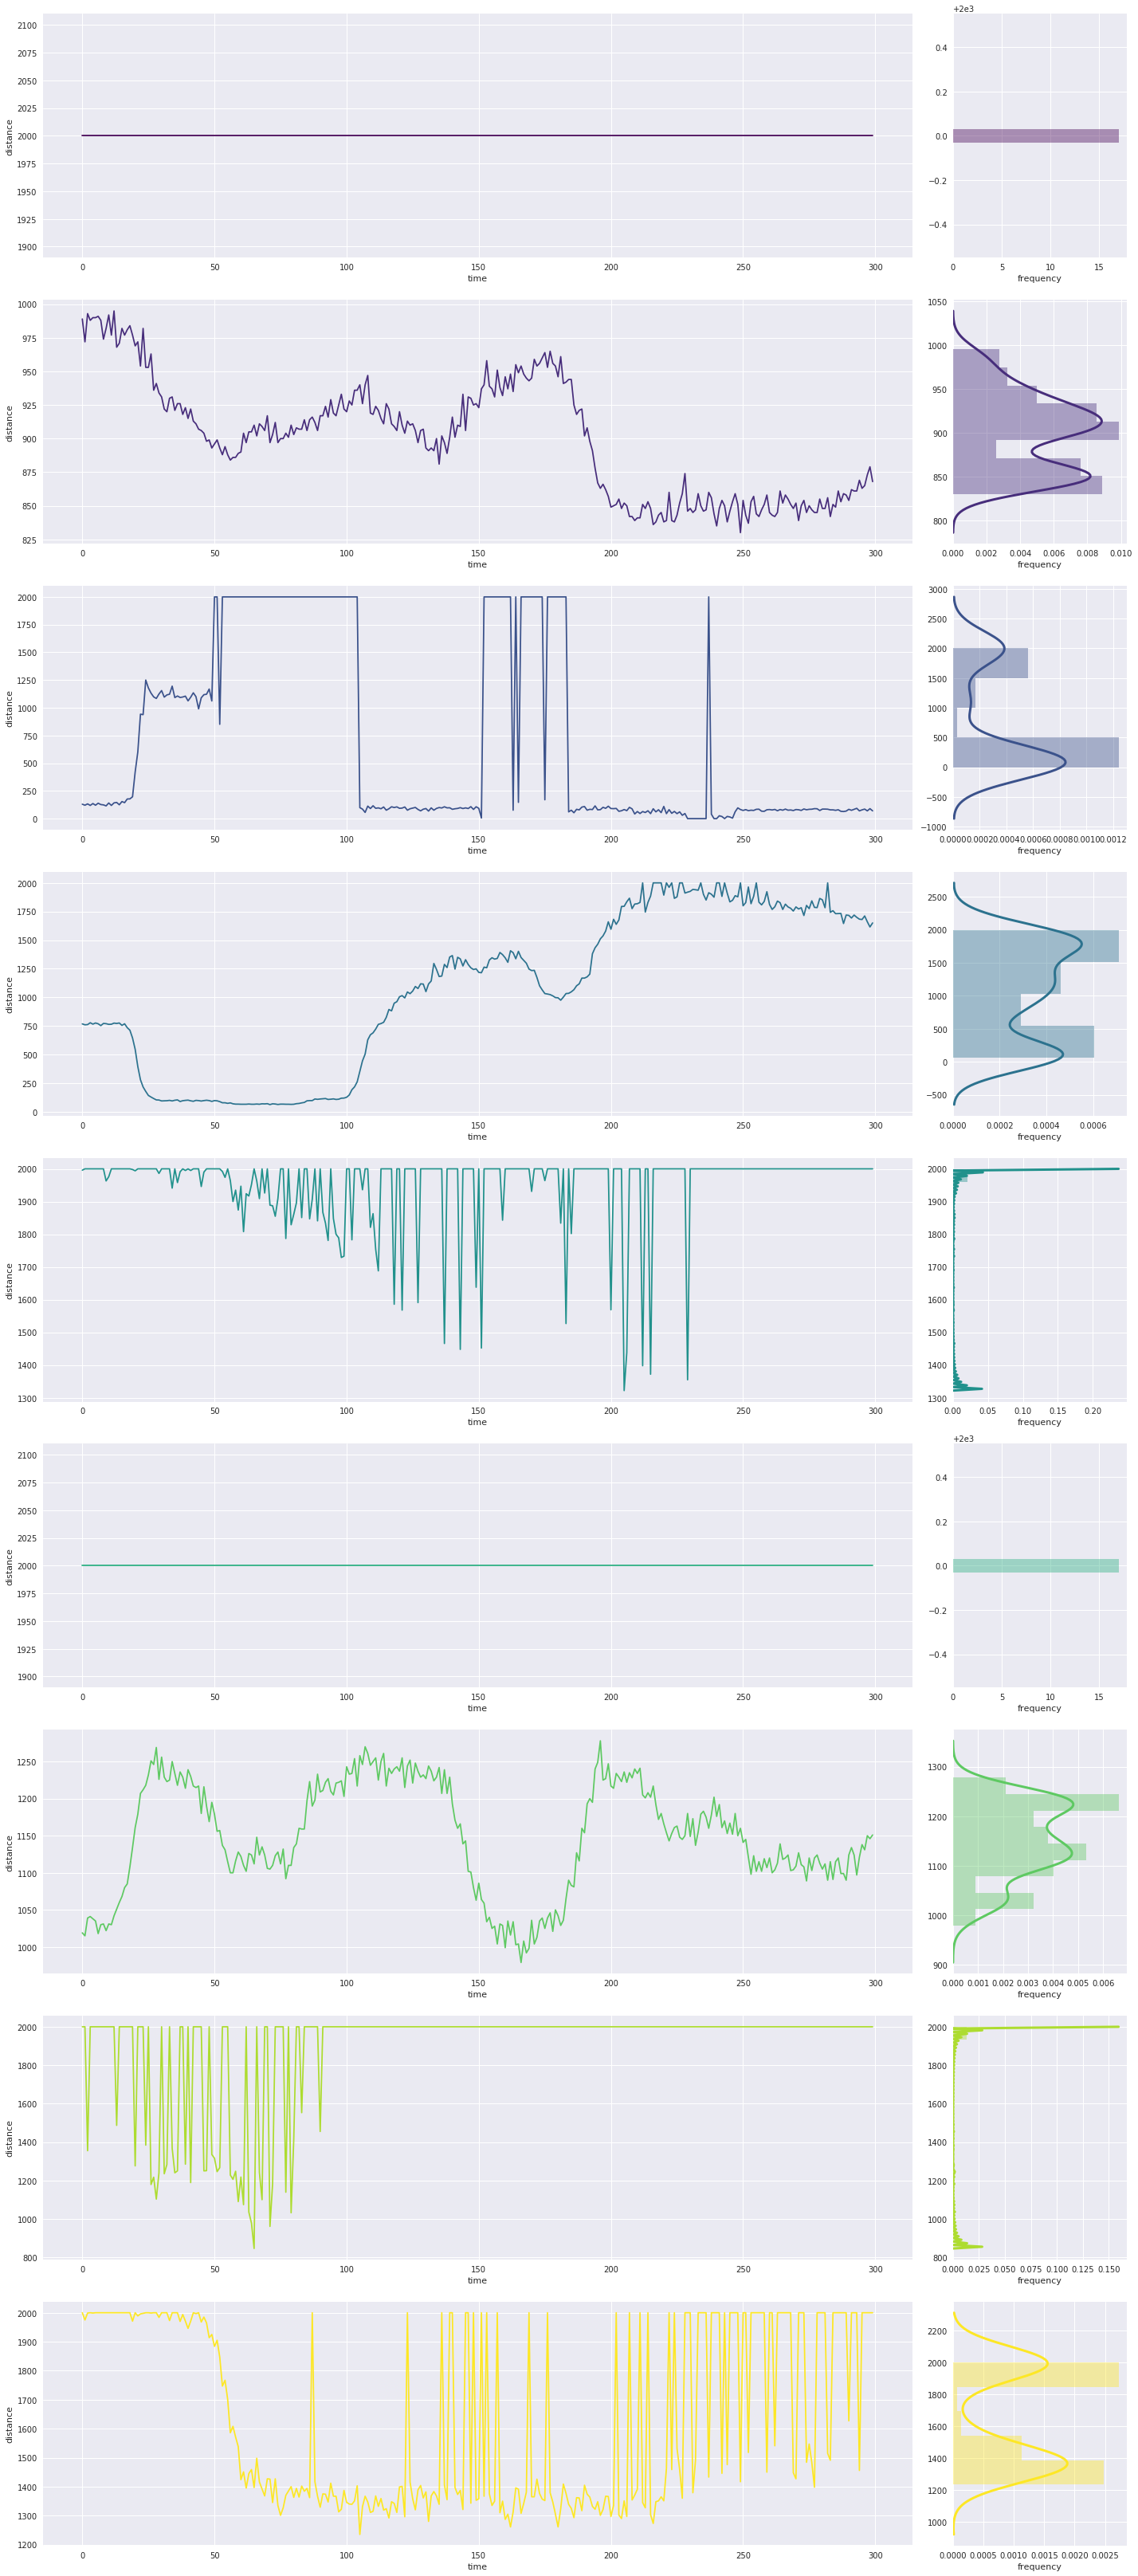

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


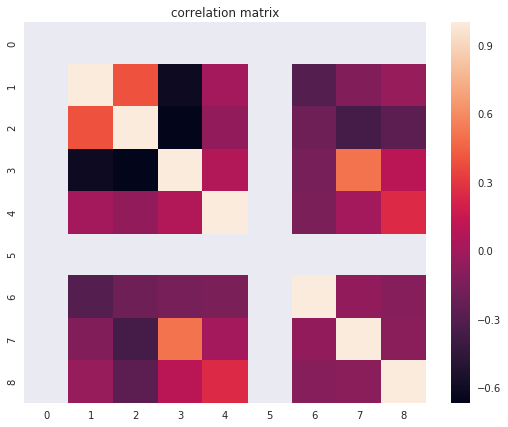

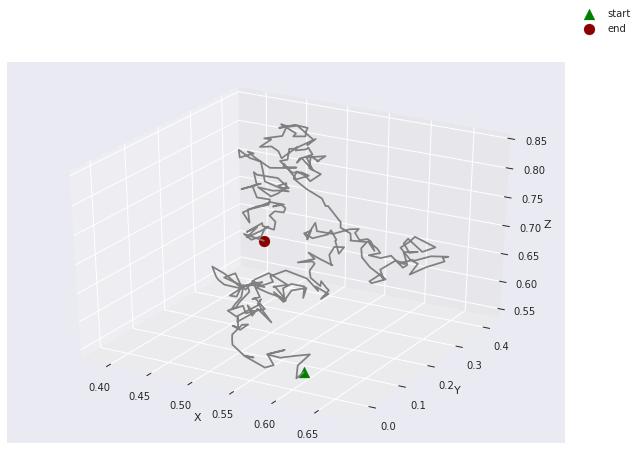

(300, 9) (300, 3)


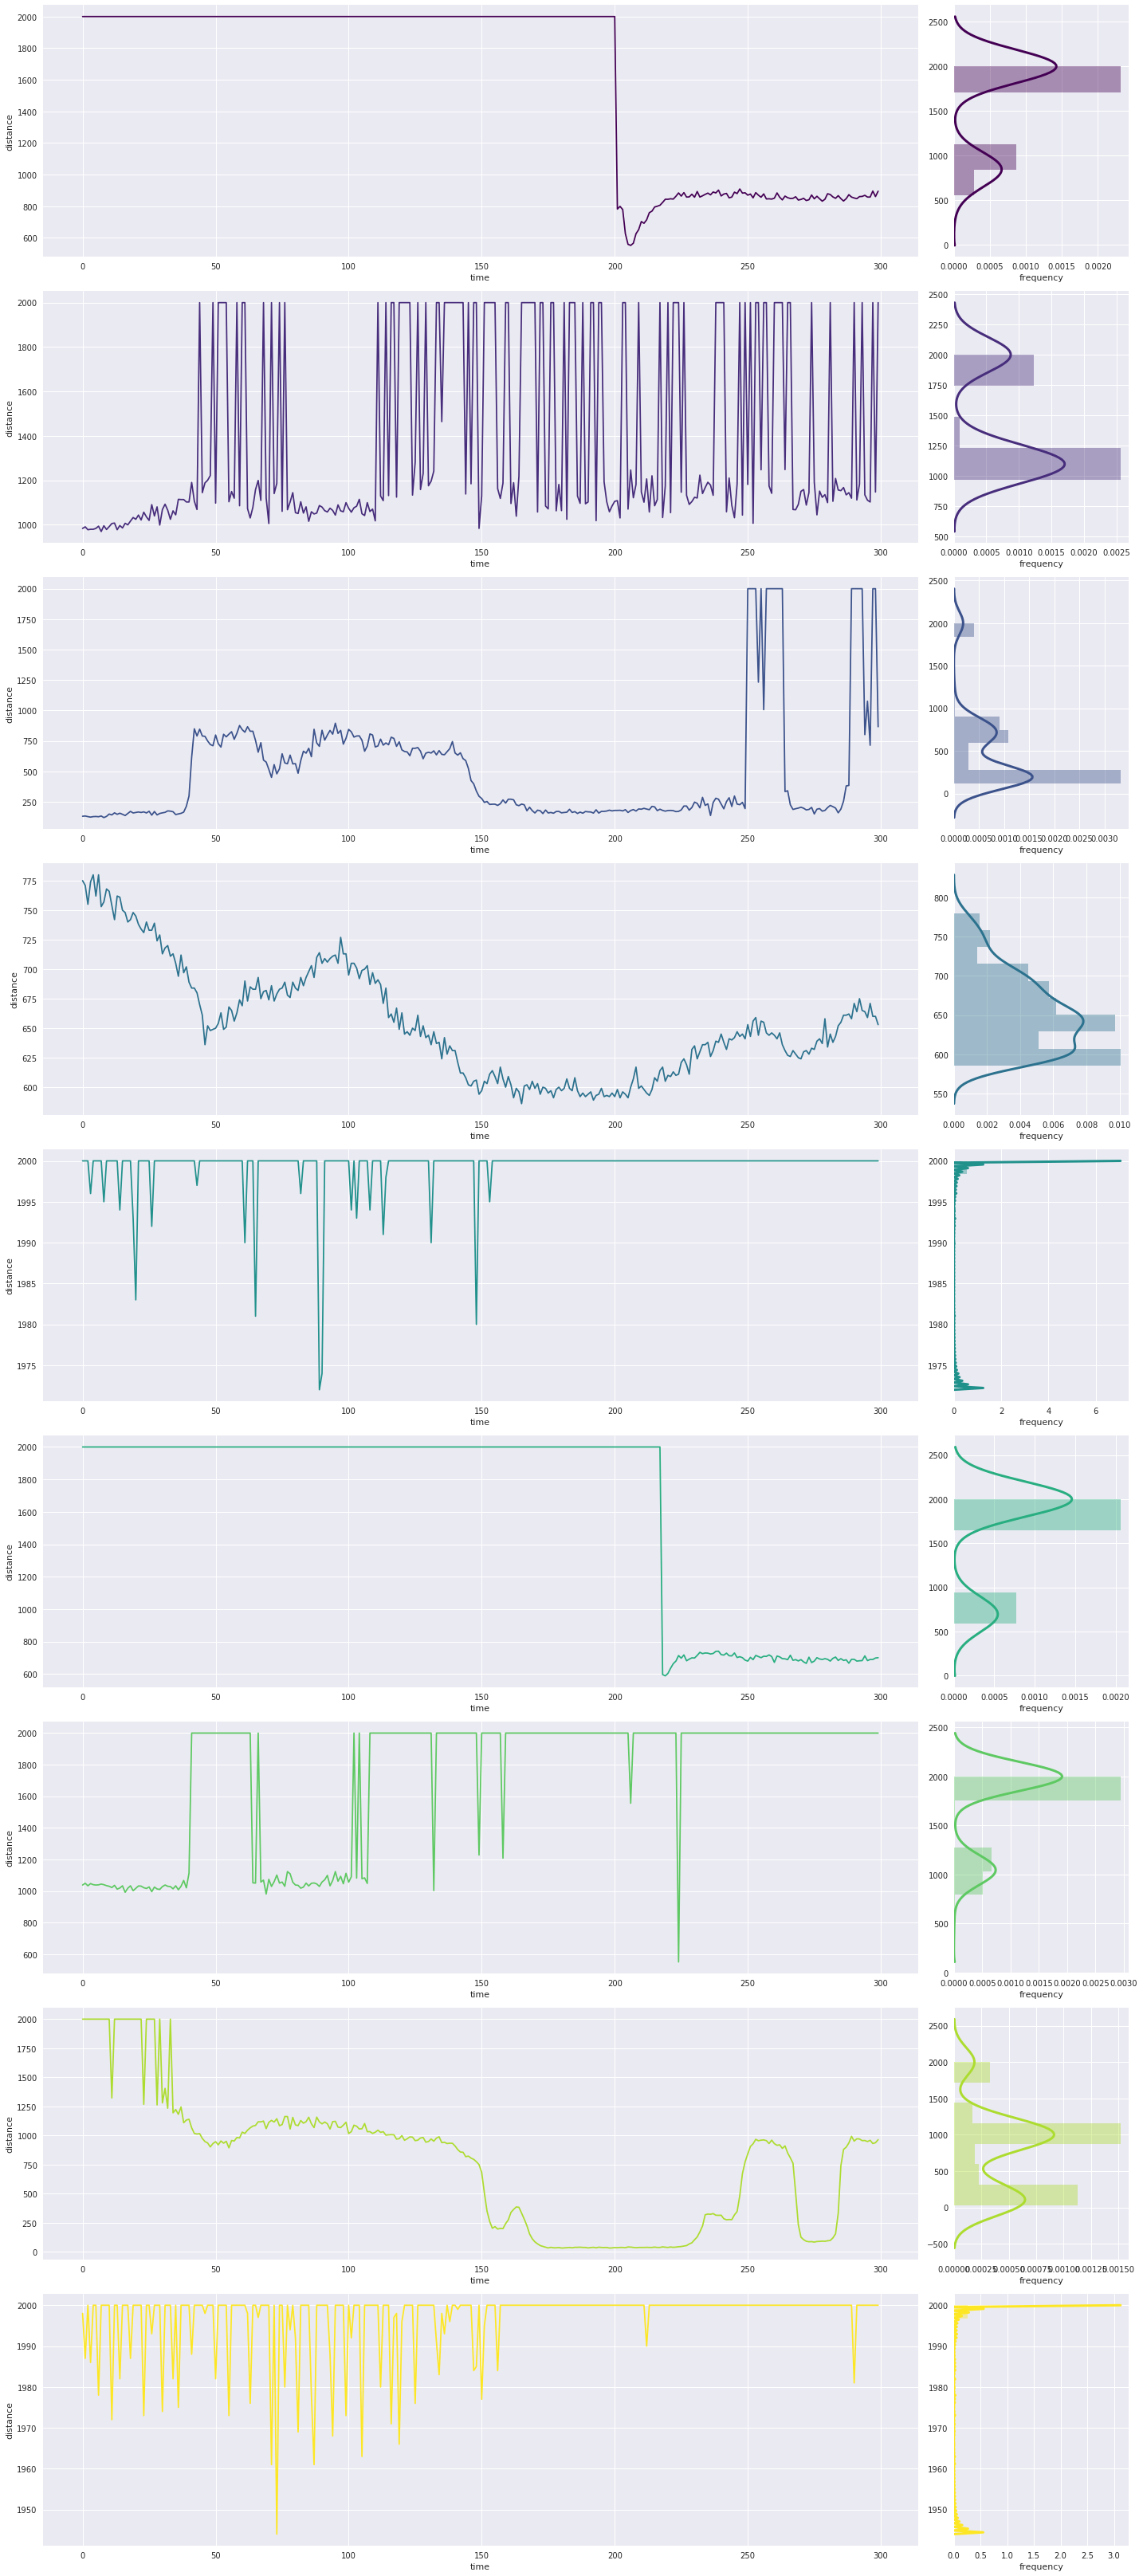

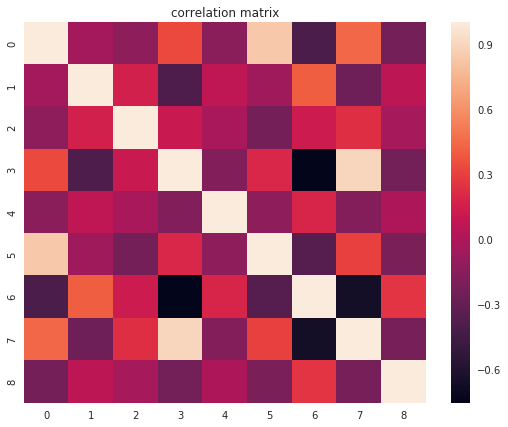

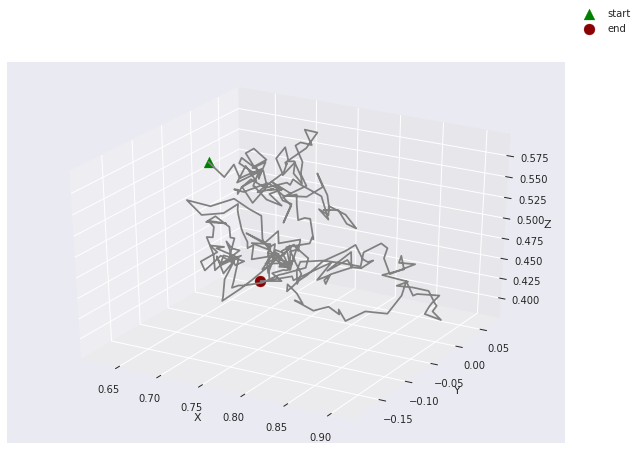

(300, 9) (300, 3)


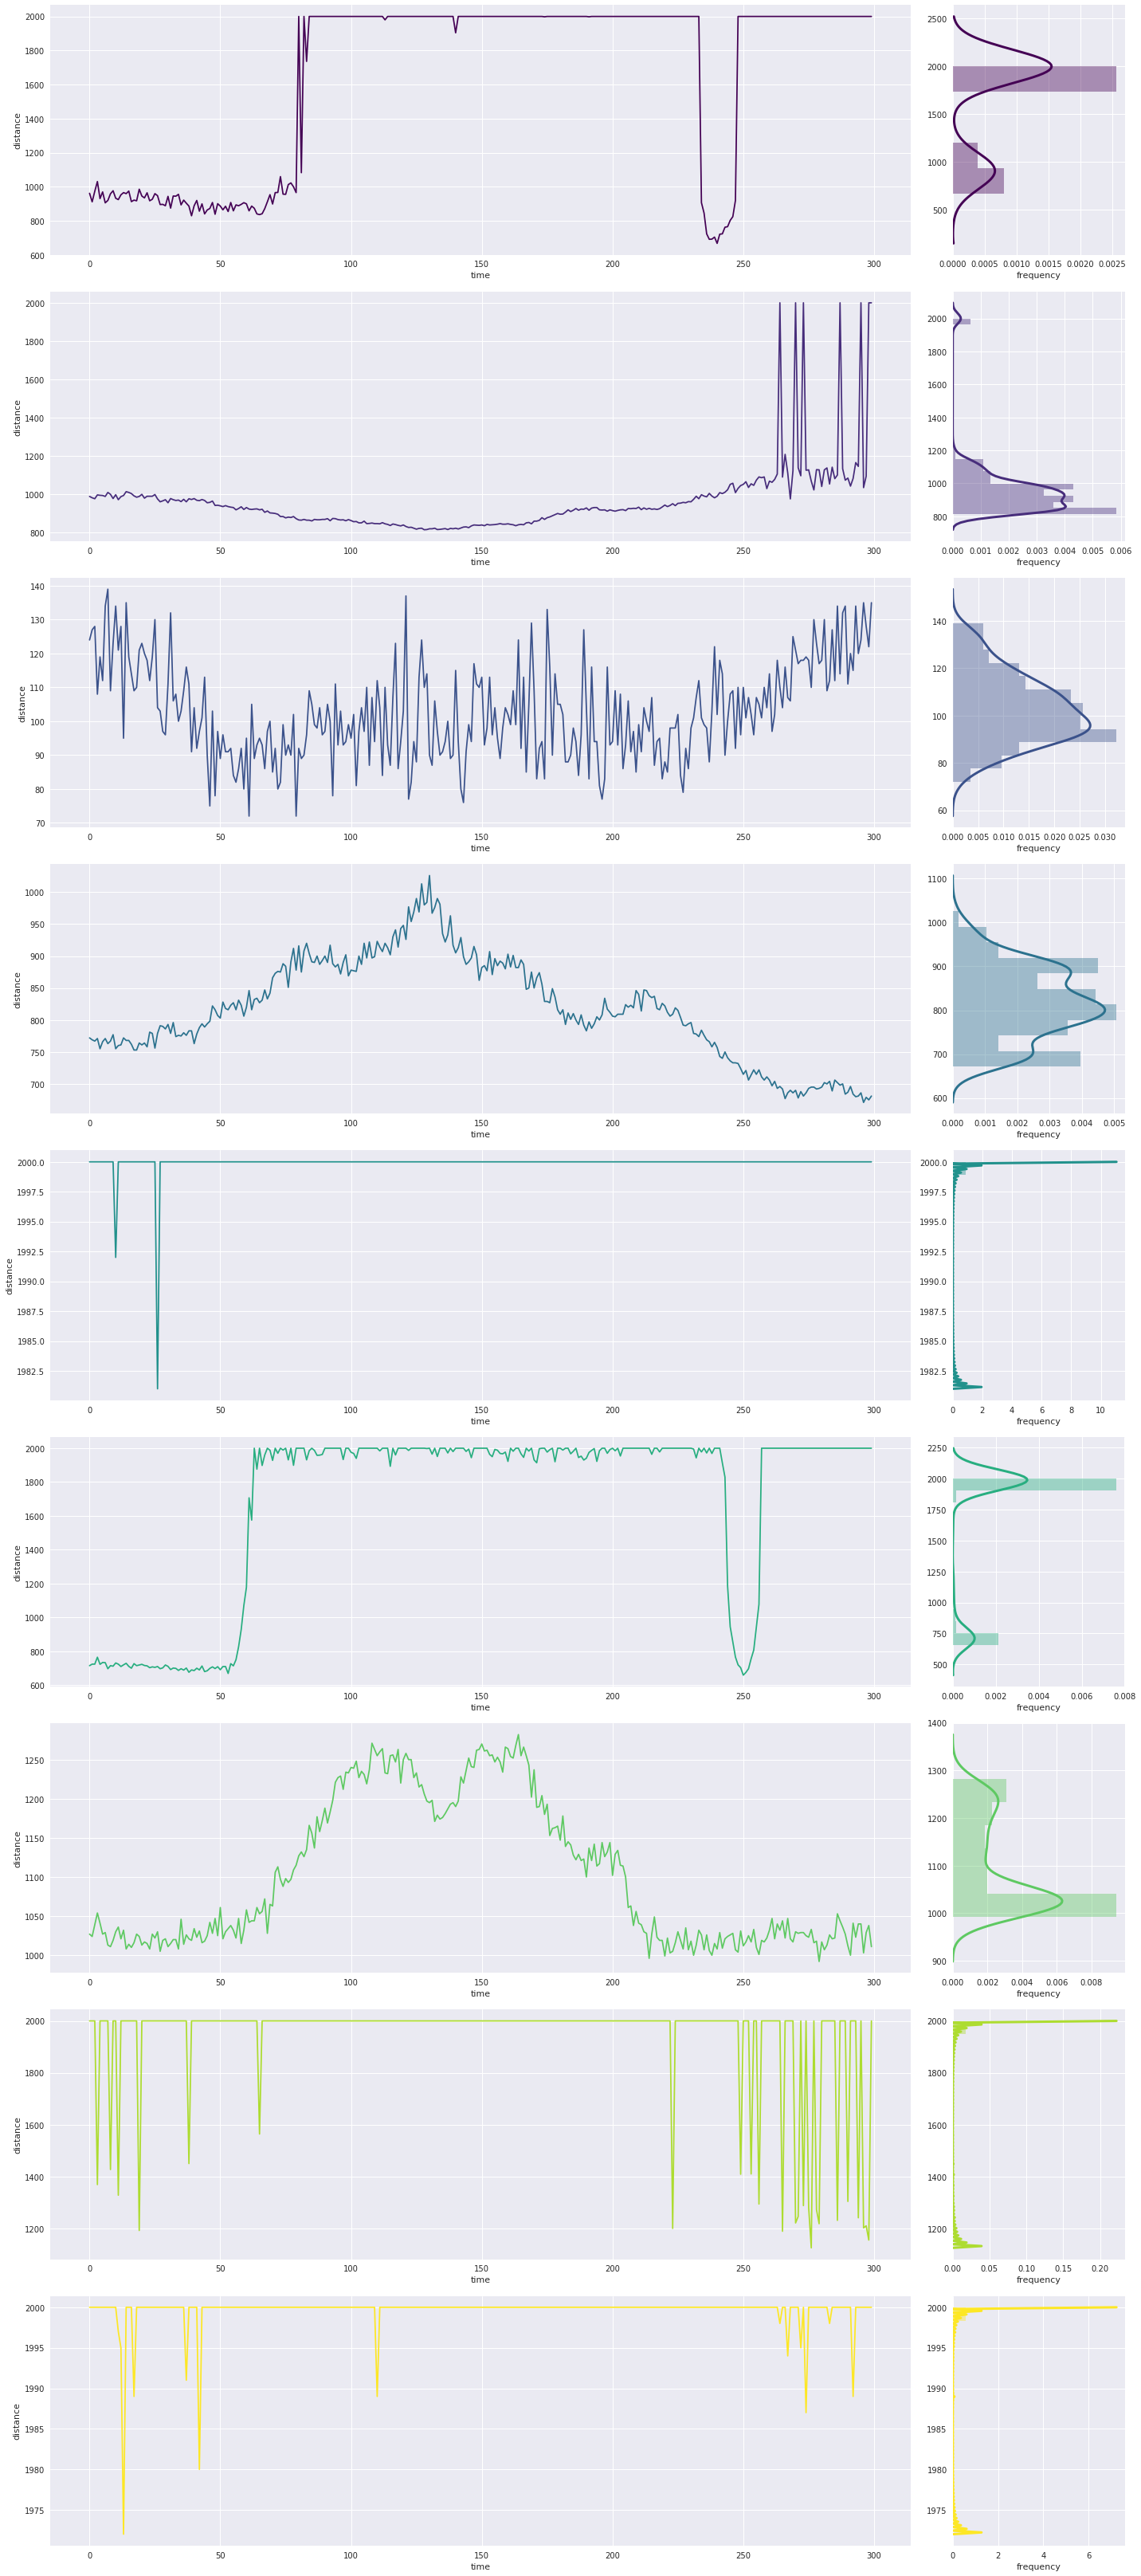

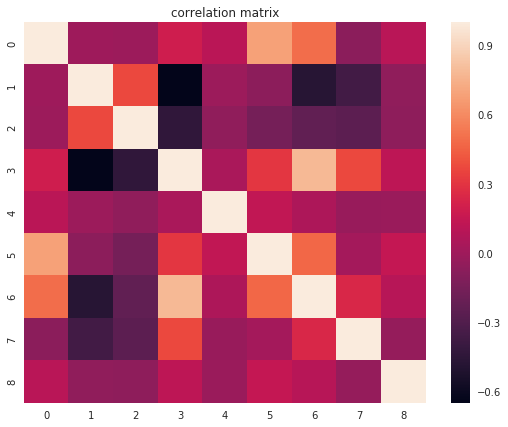

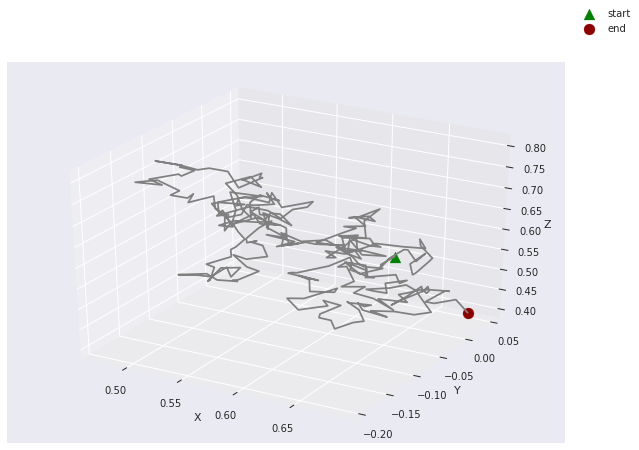

(300, 9) (300, 3)


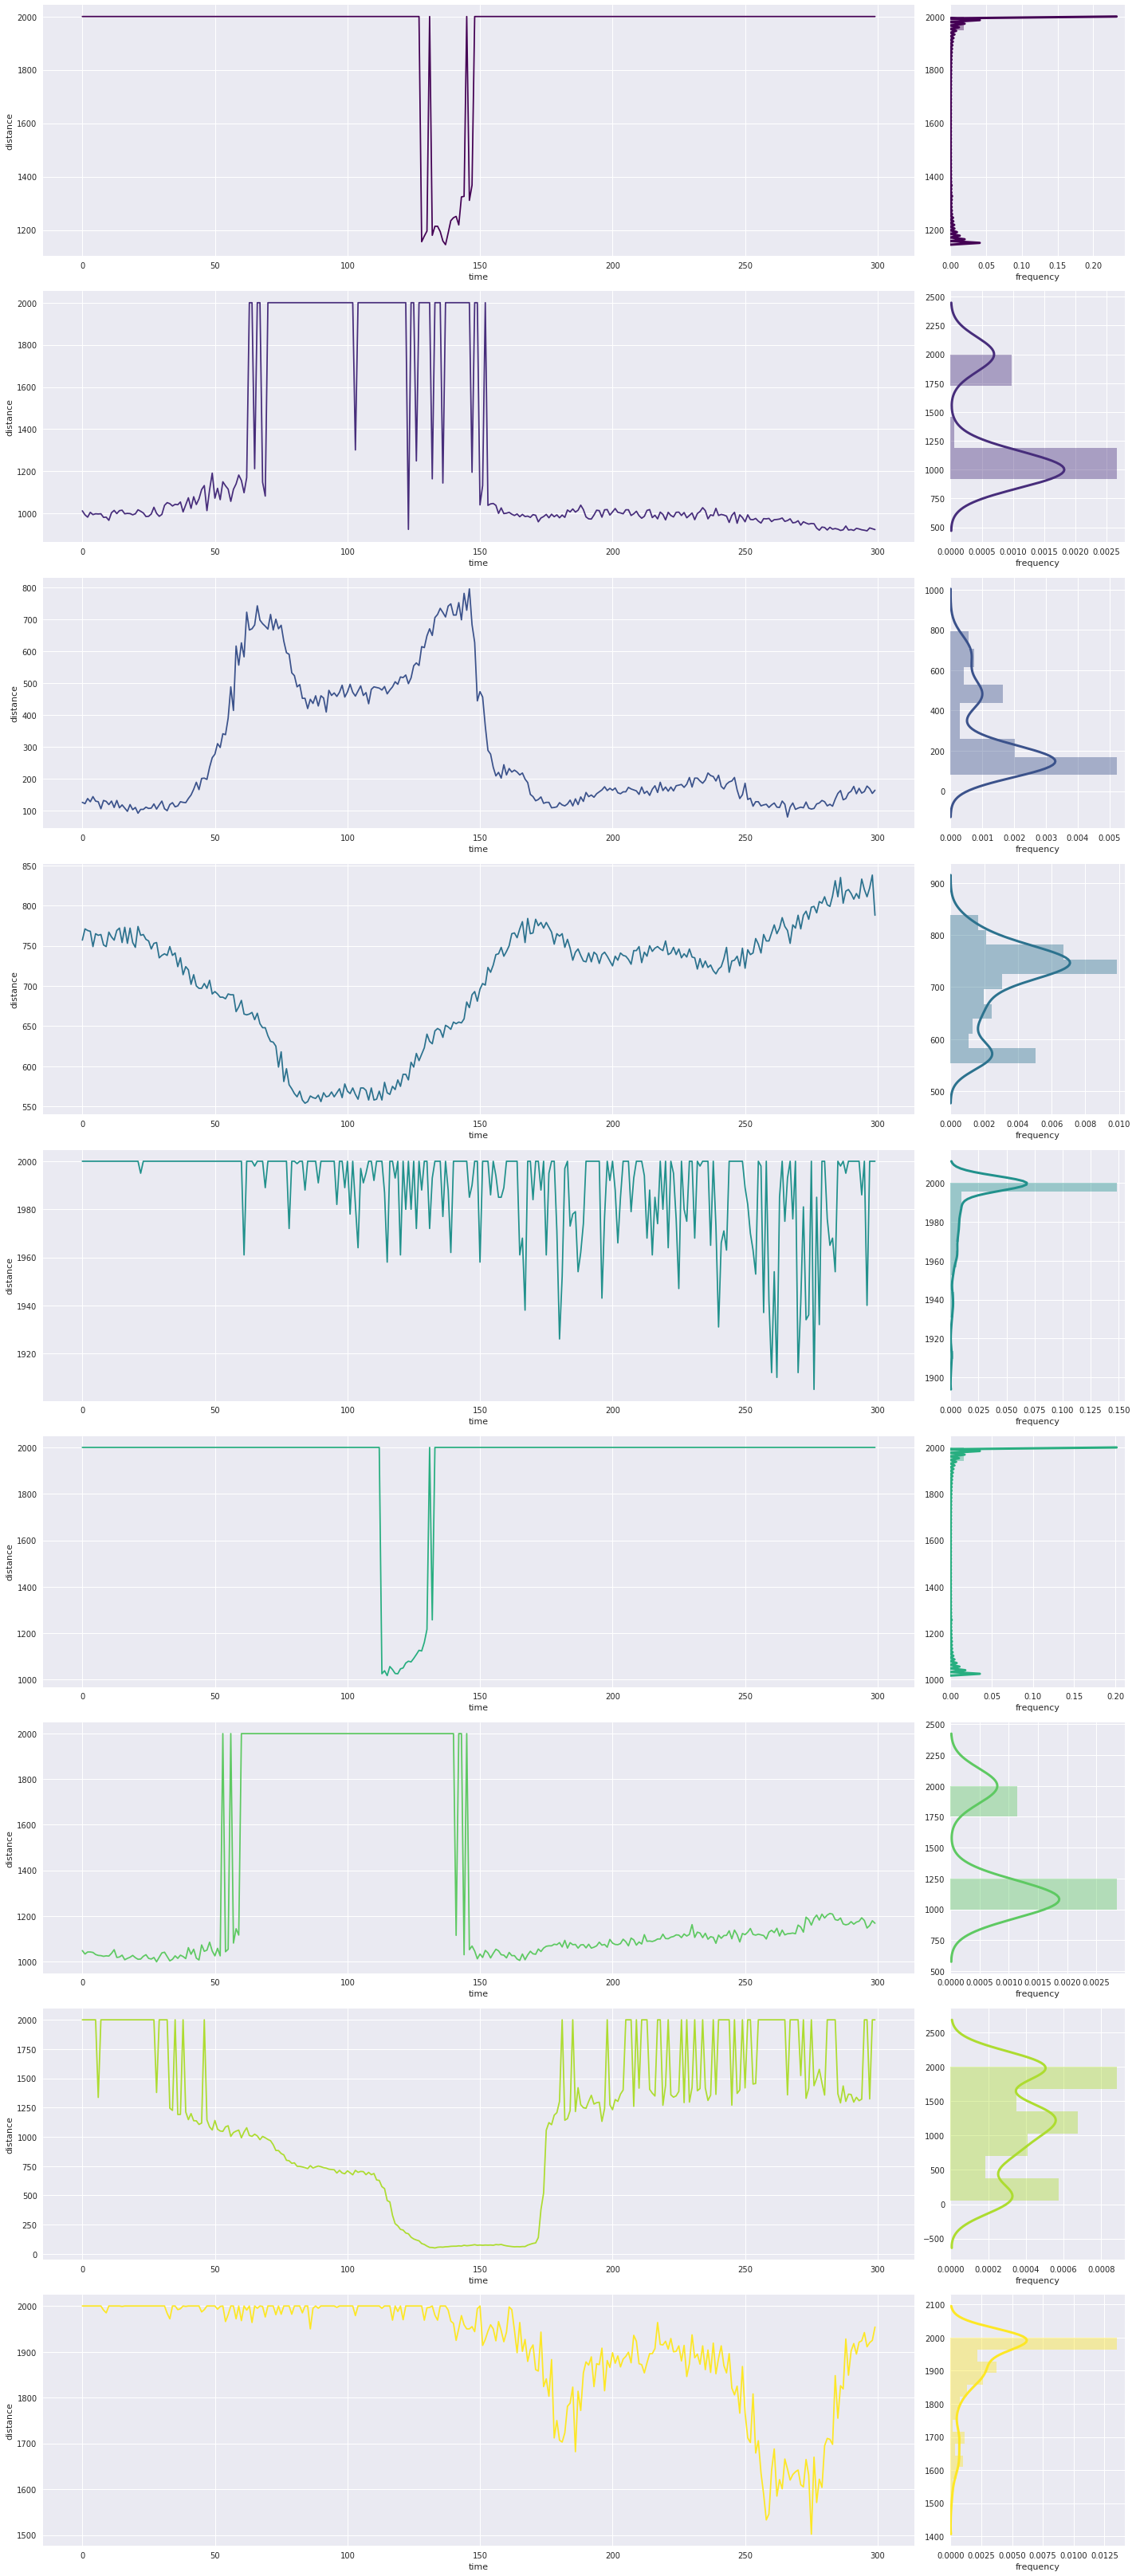

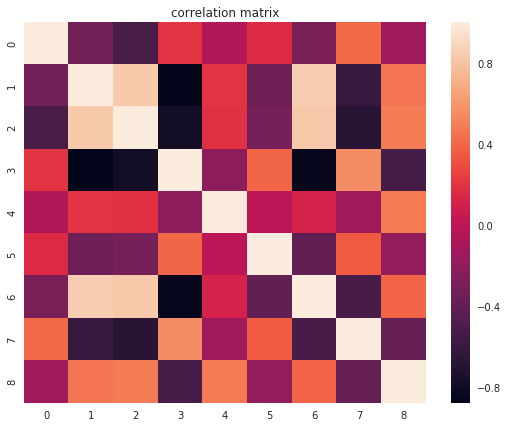

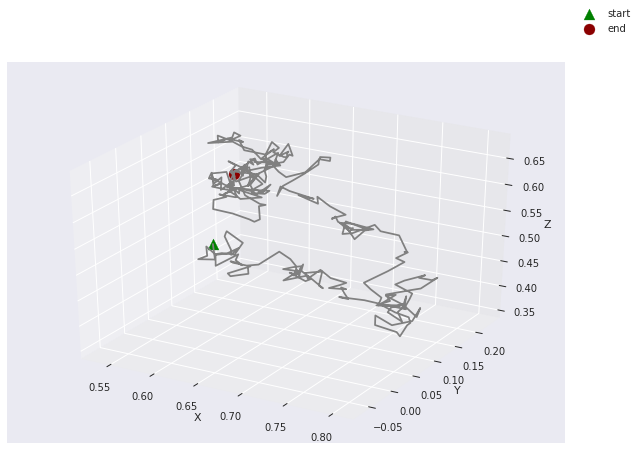

(300, 9) (300, 3)


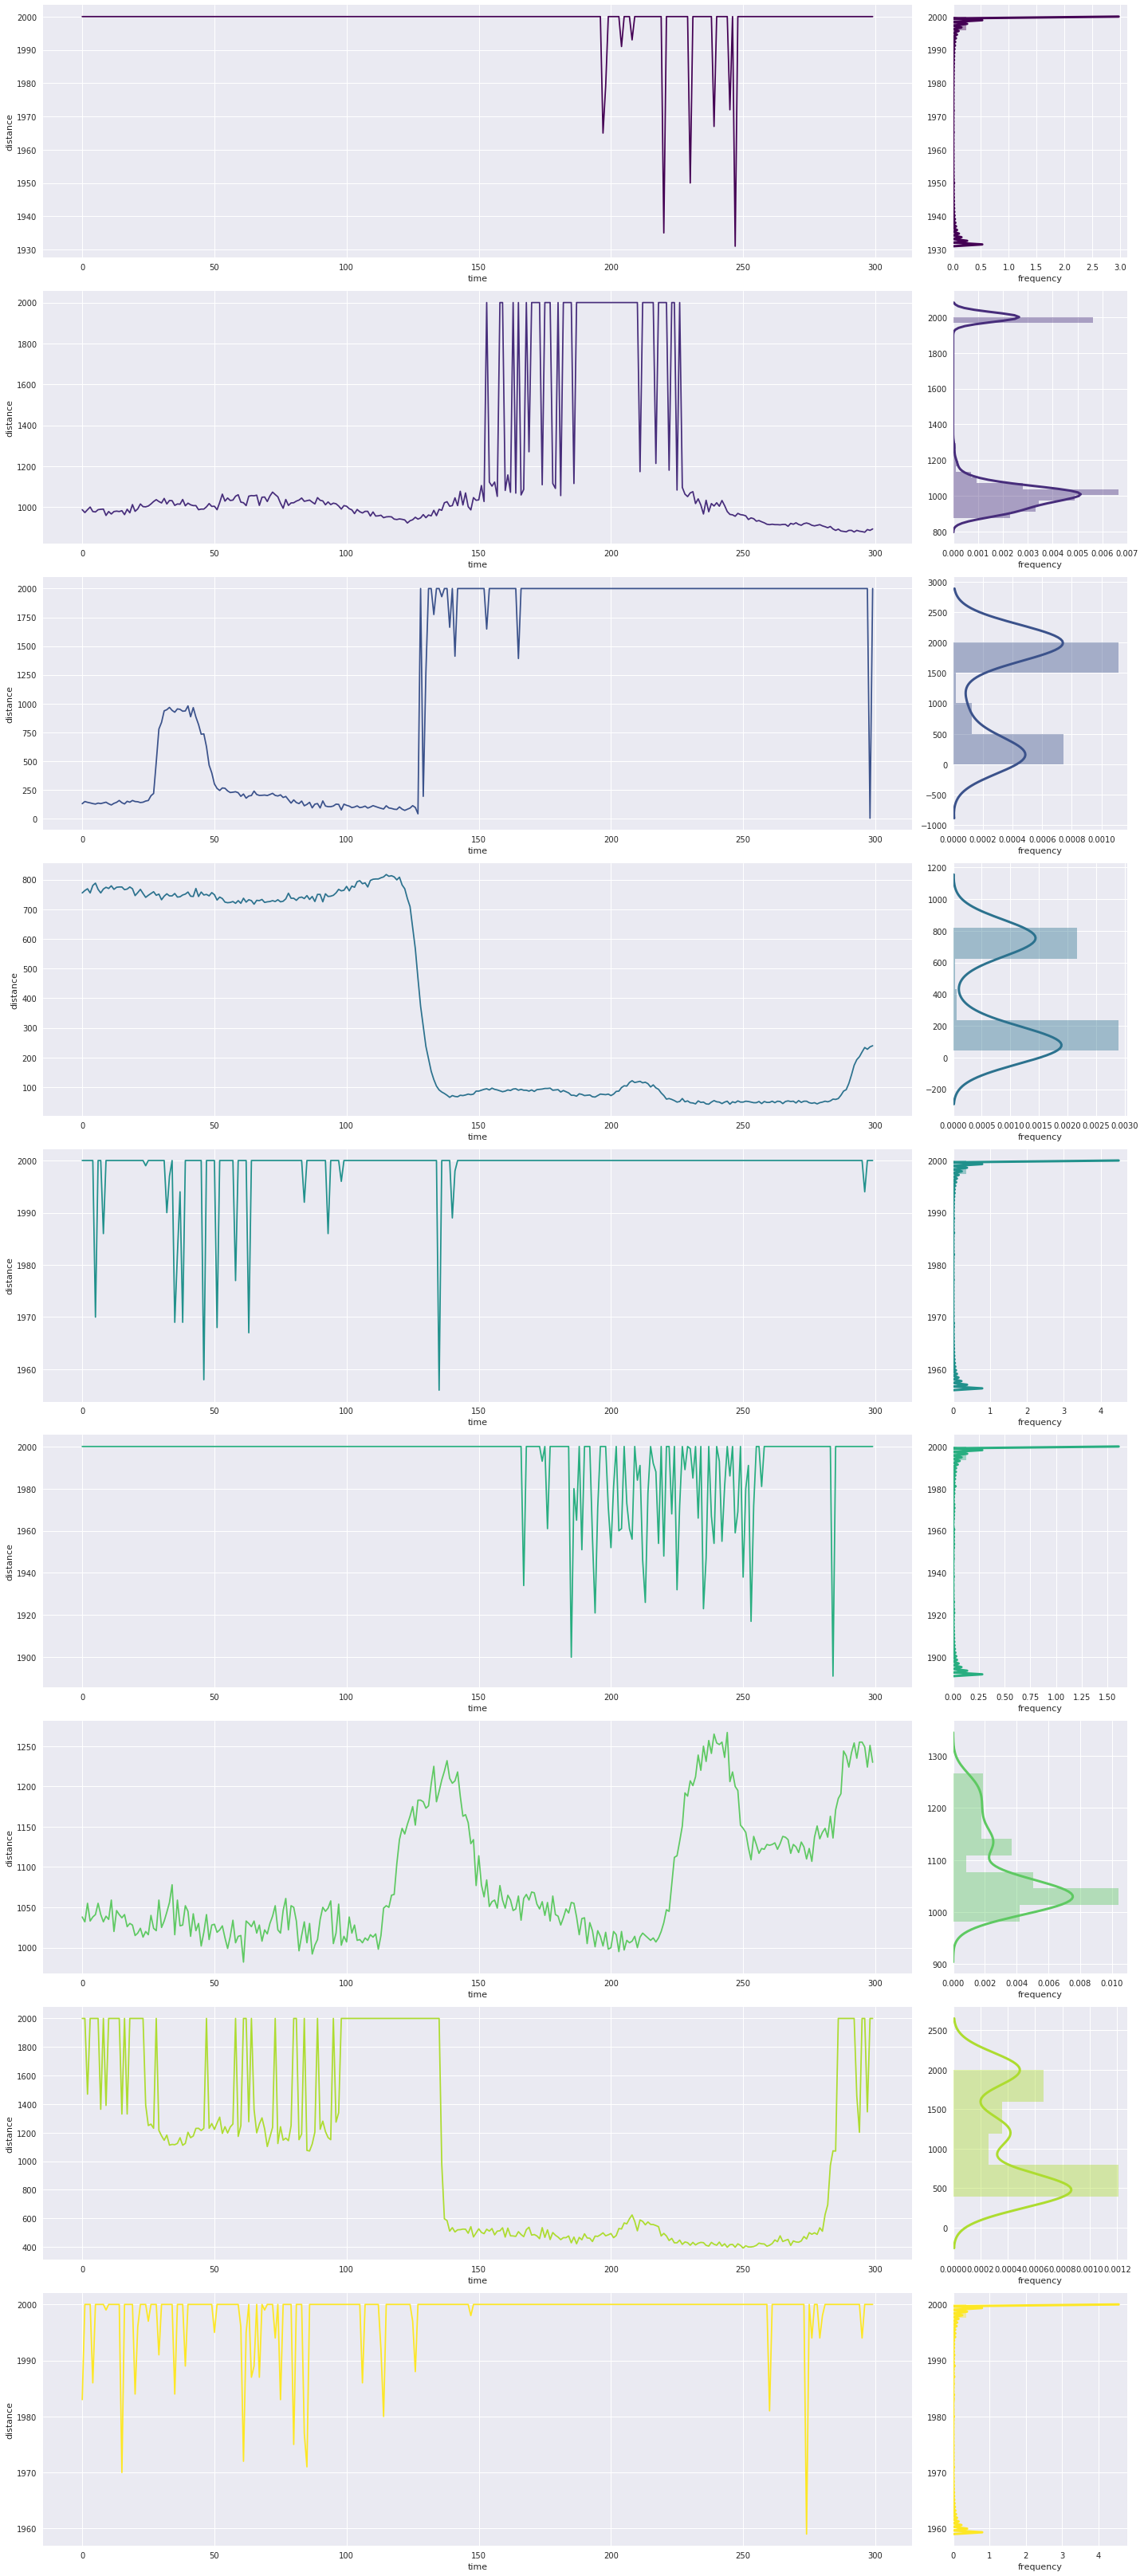

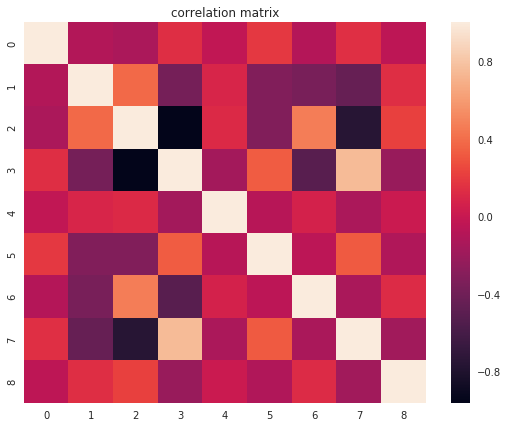

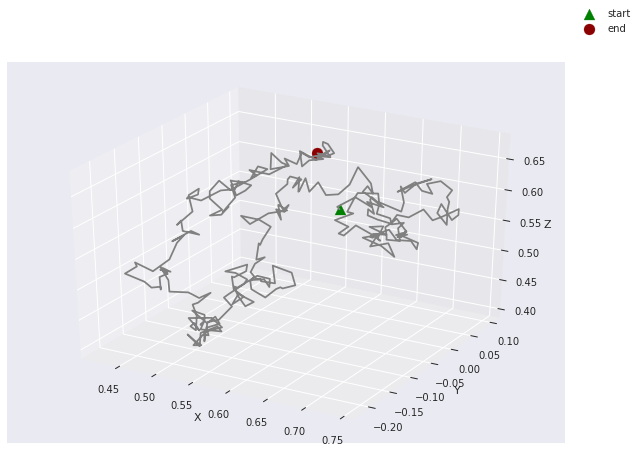

(300, 9) (300, 3)


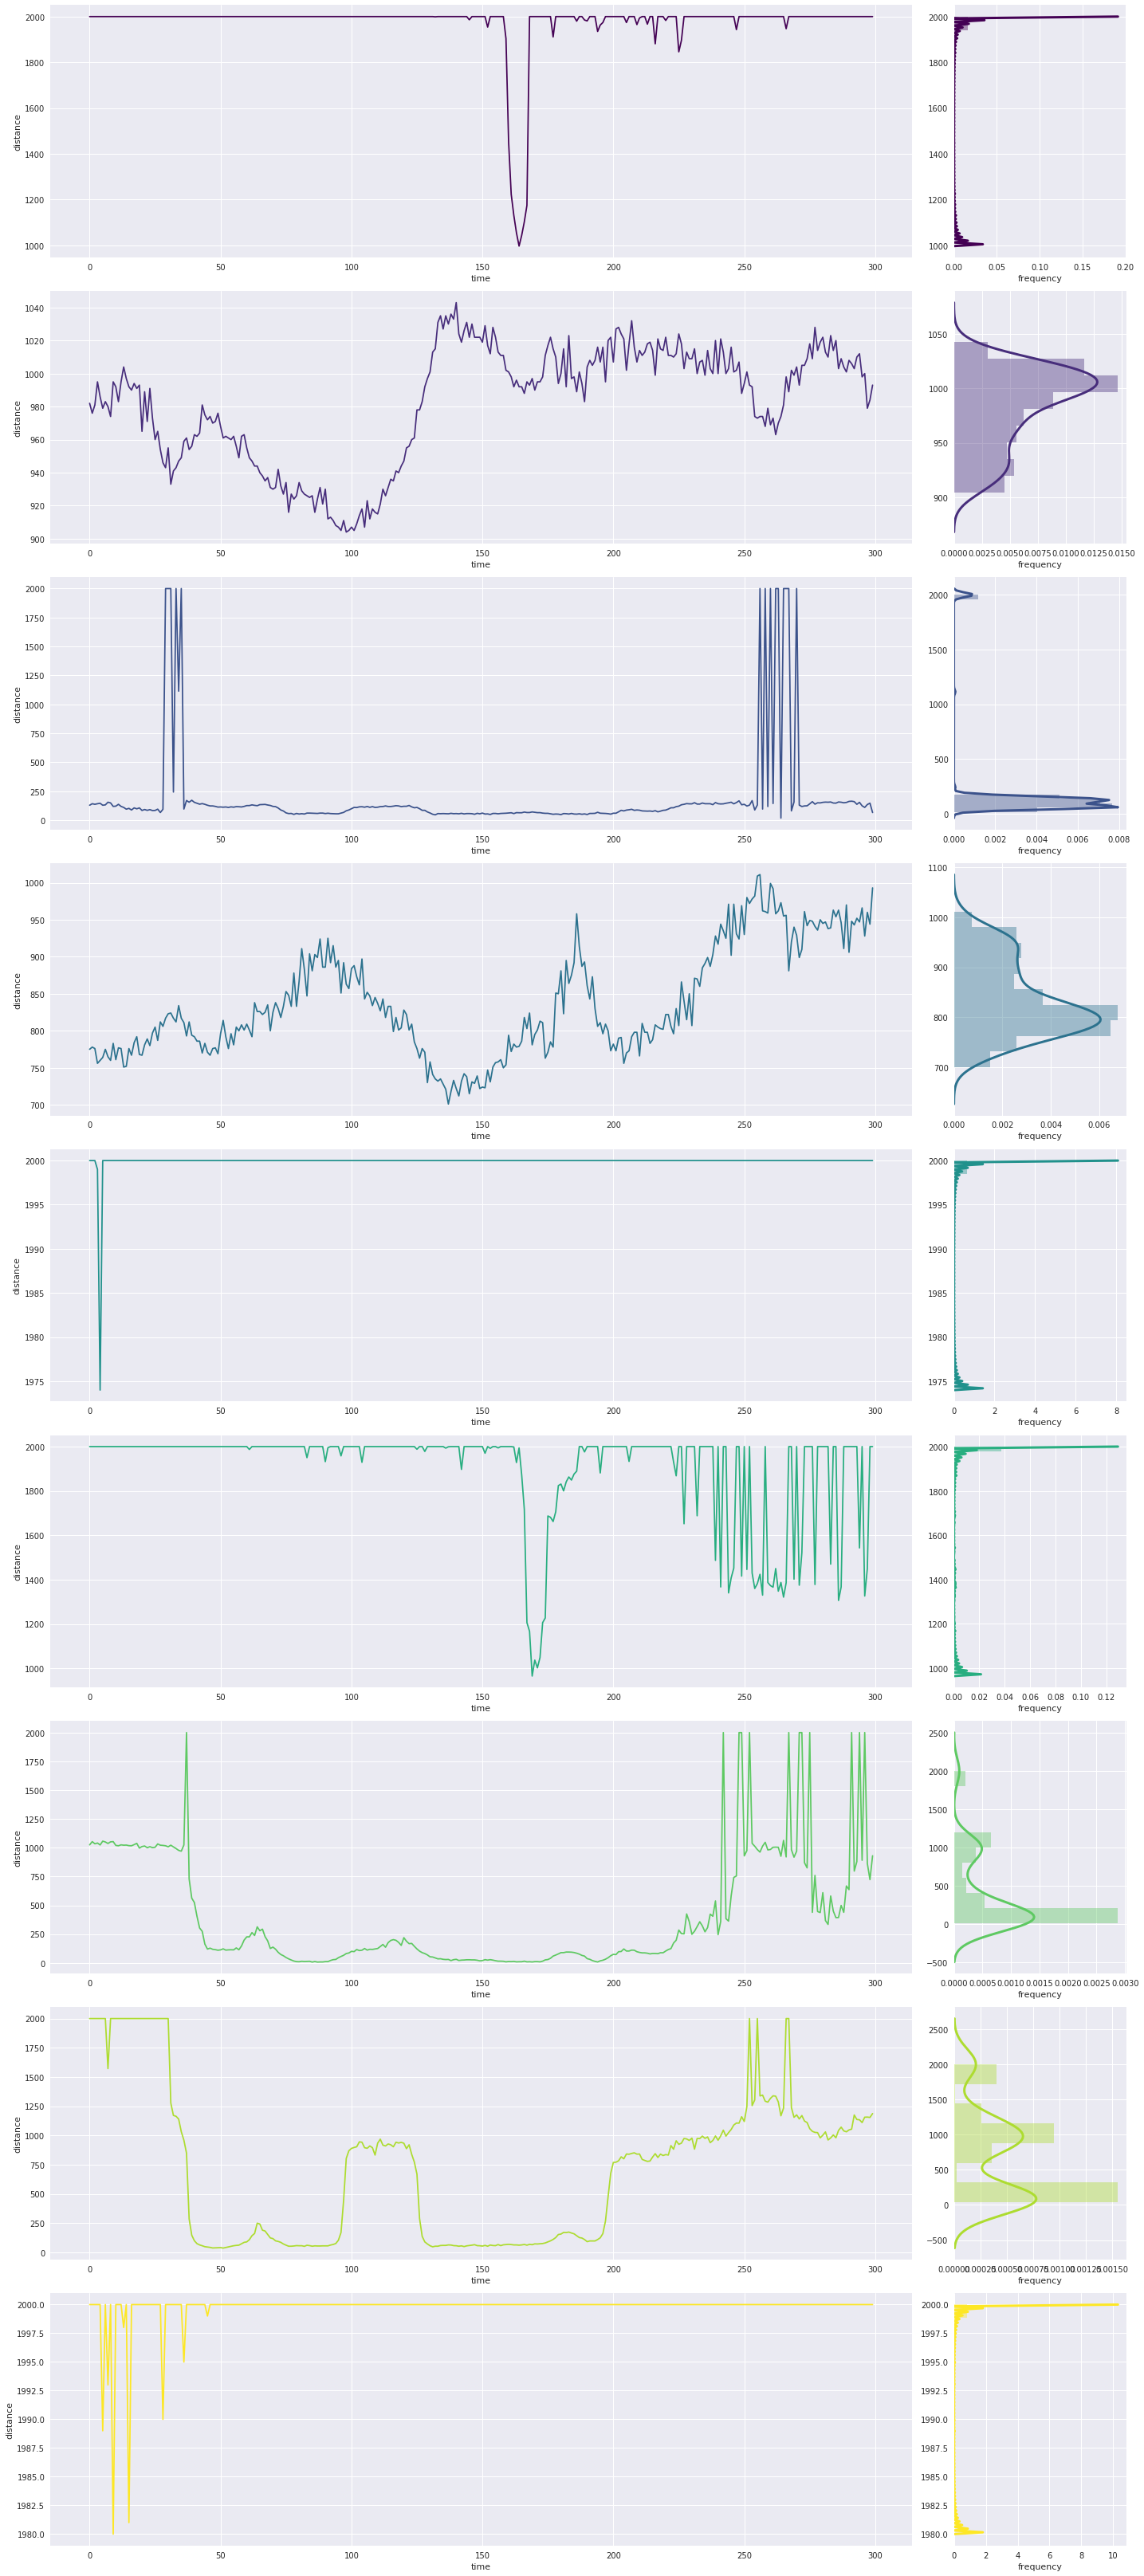

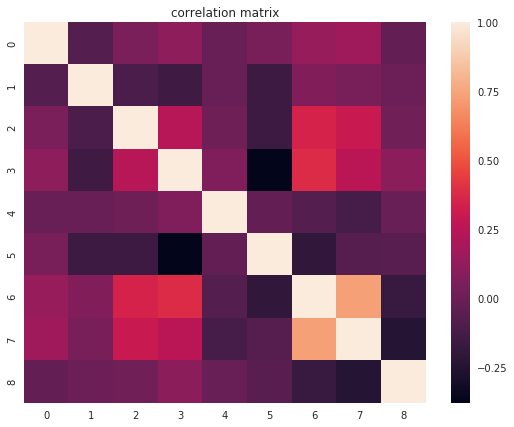

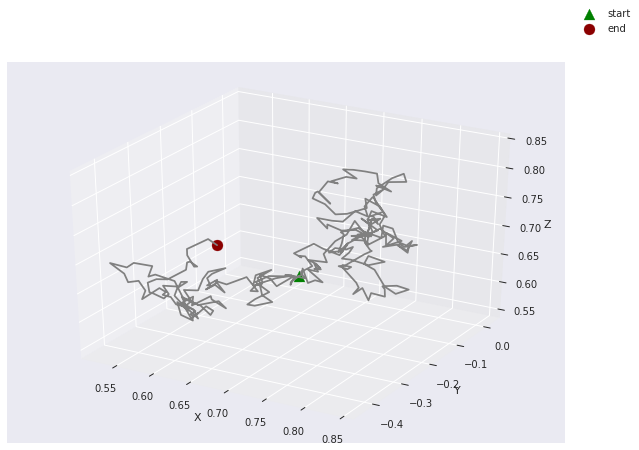

(300, 9) (300, 3)


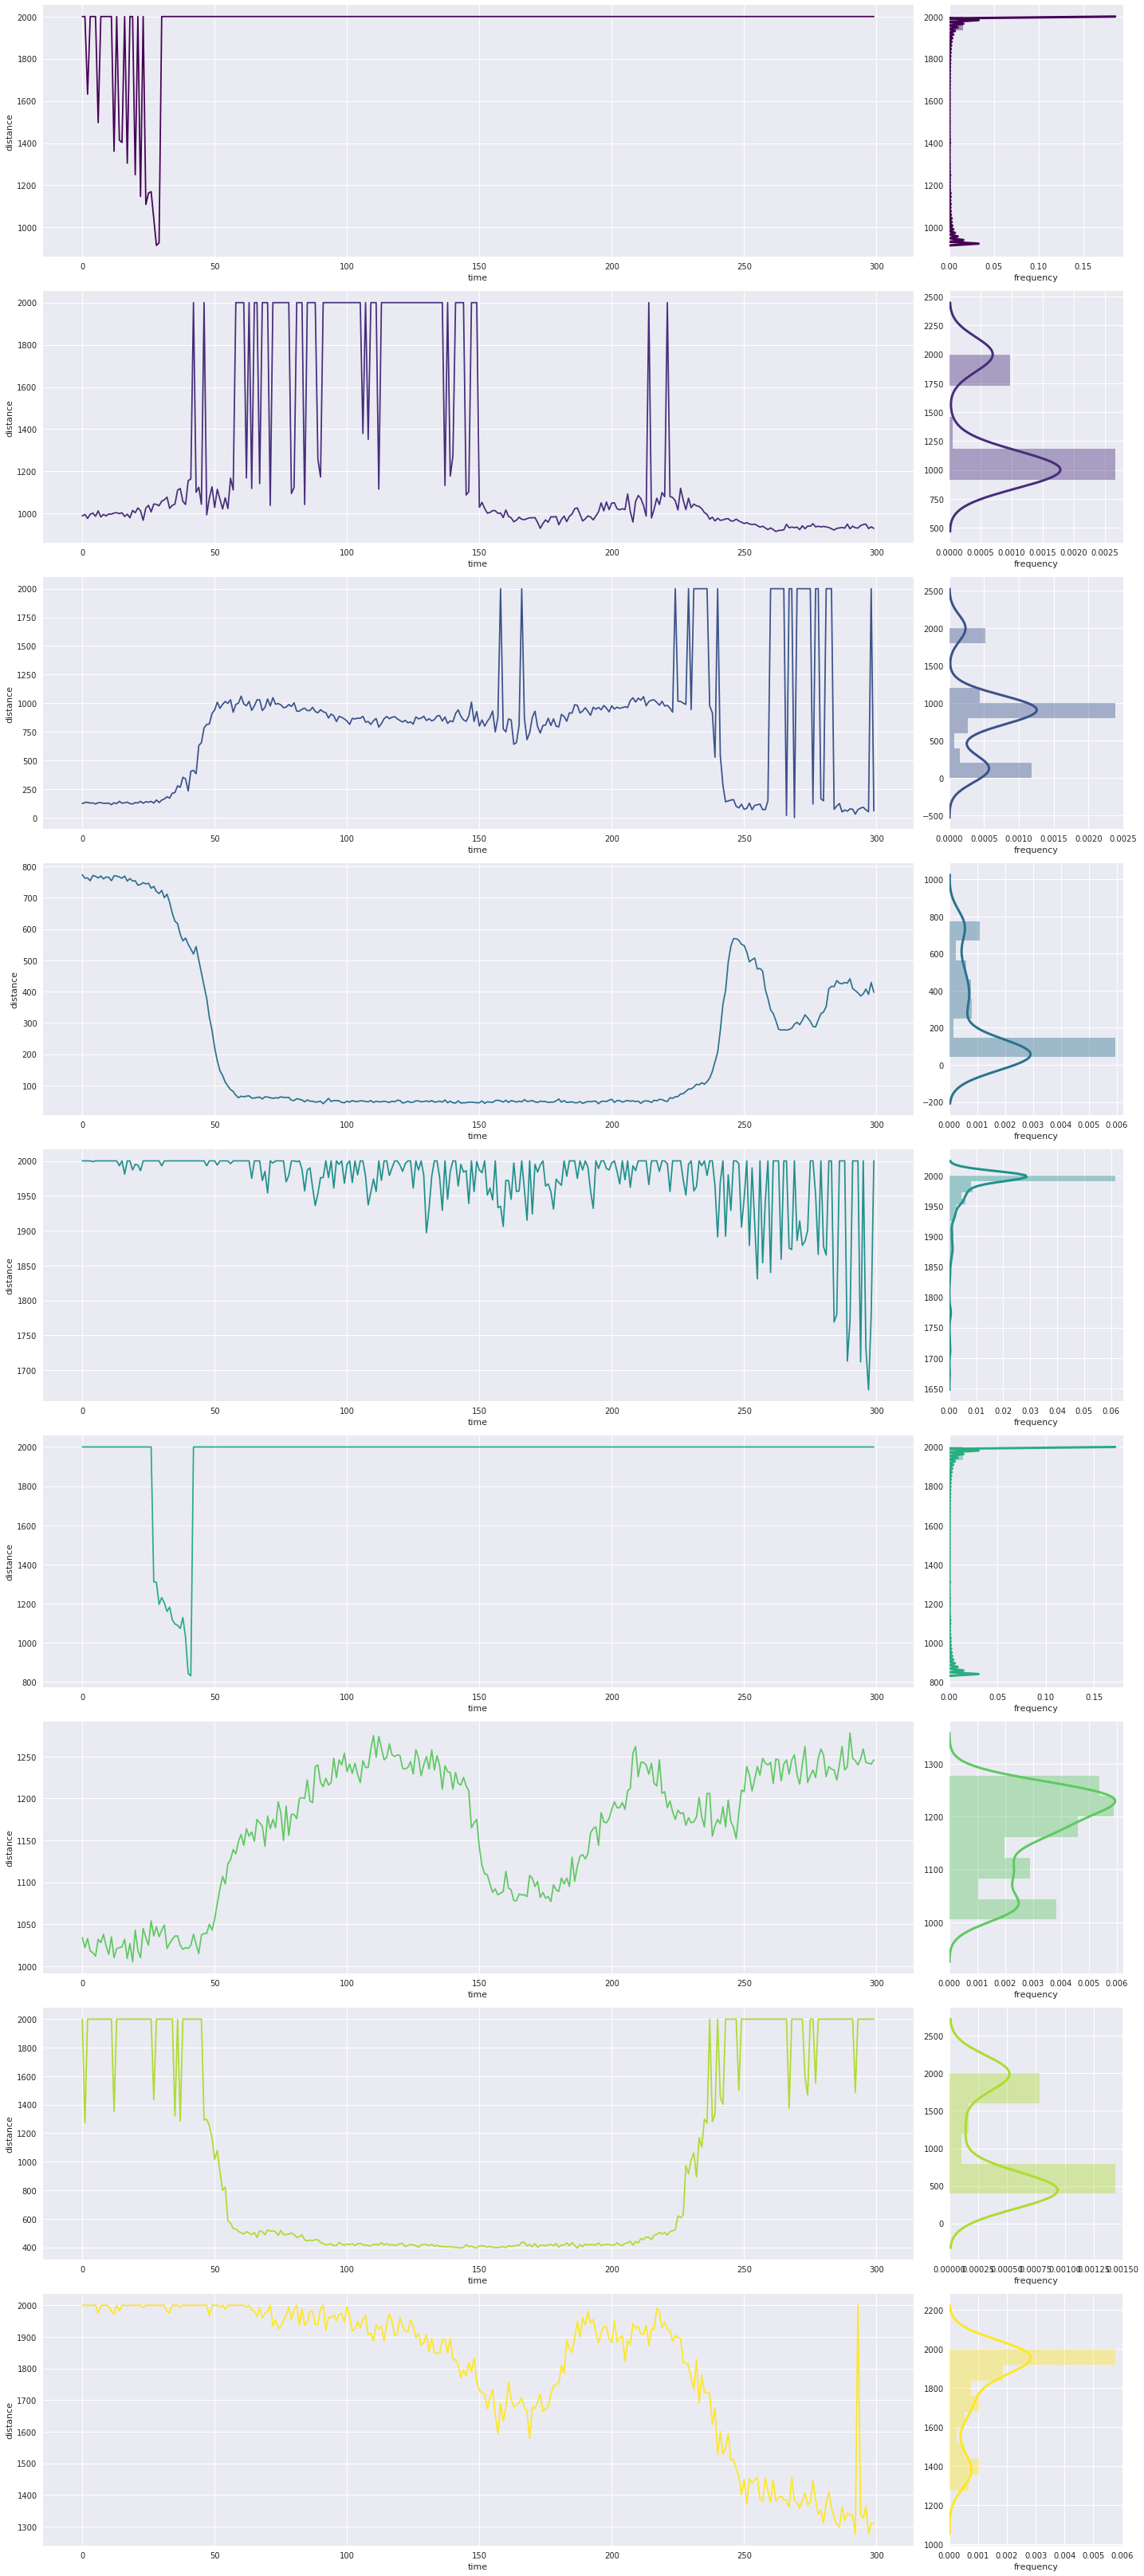

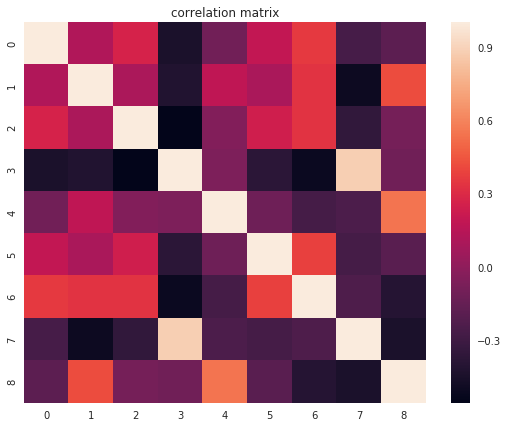

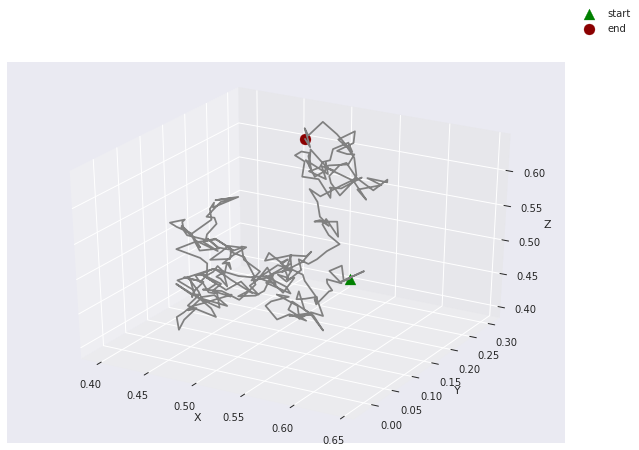

(300, 9) (300, 3)


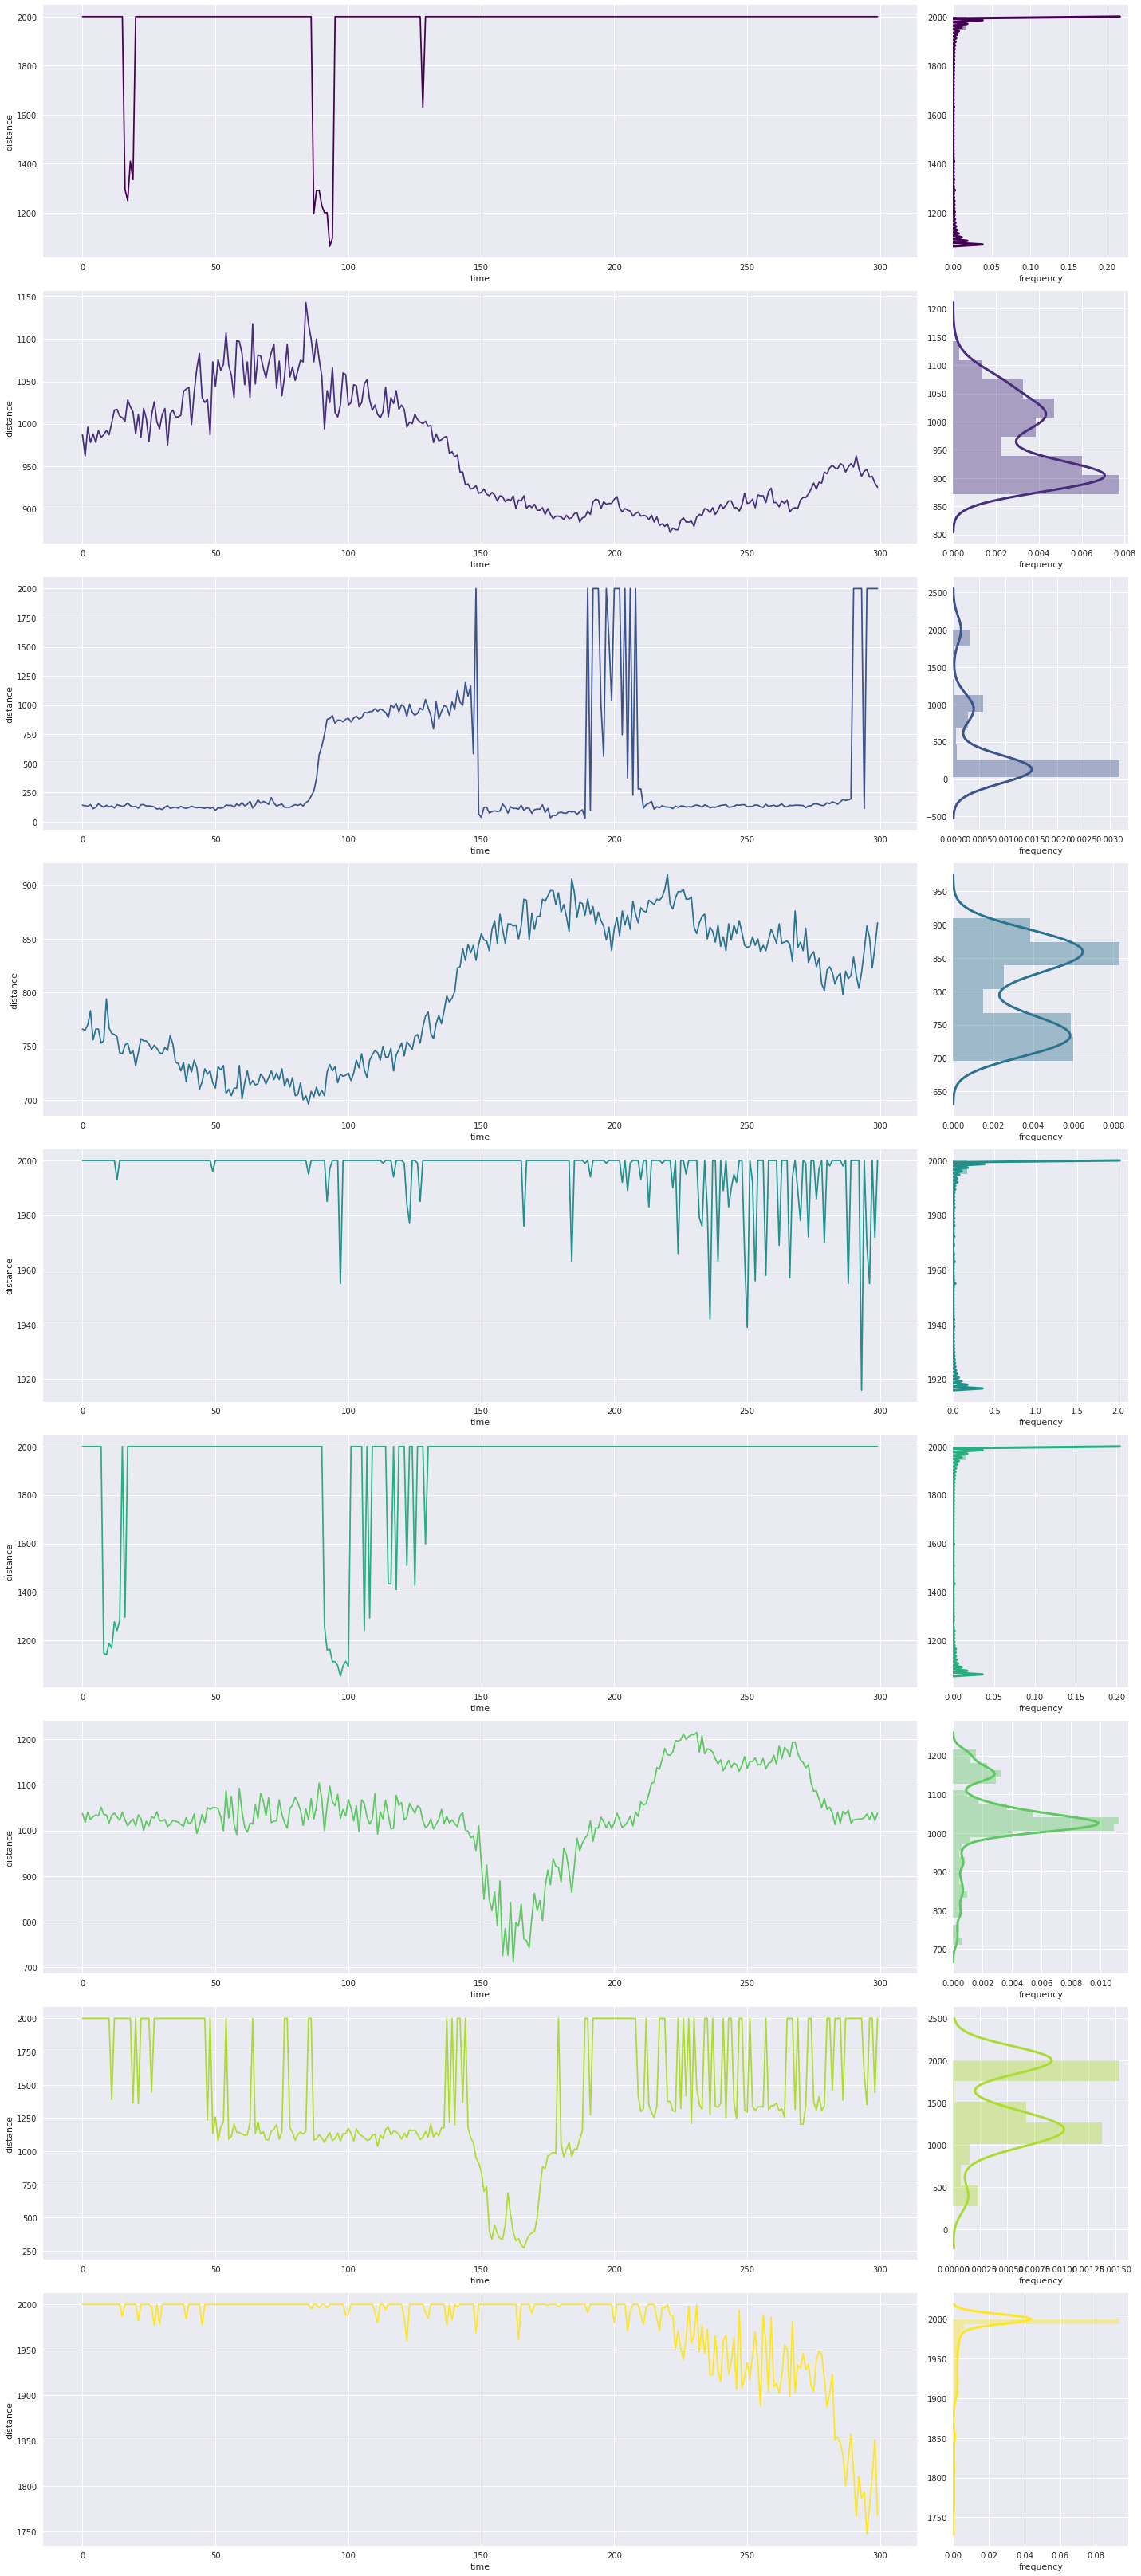

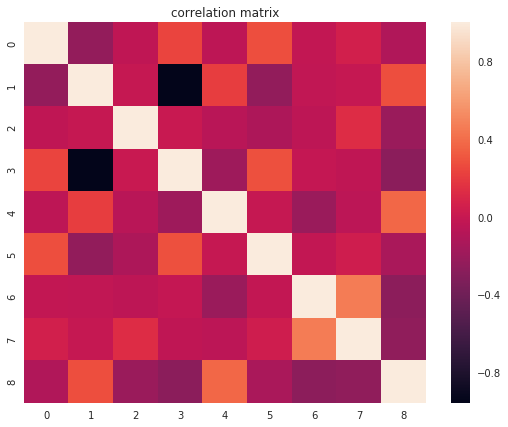

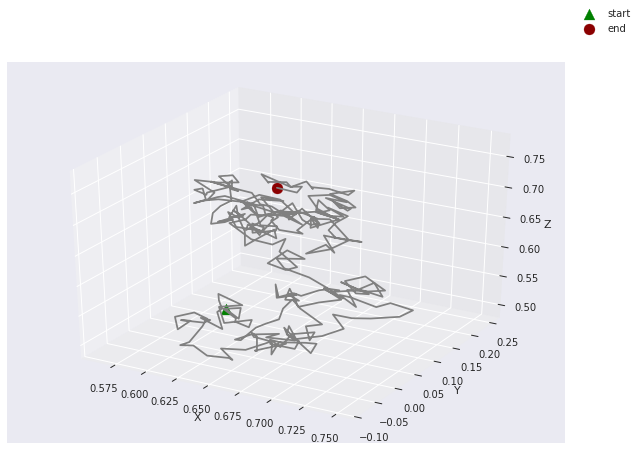

(300, 9) (300, 3)


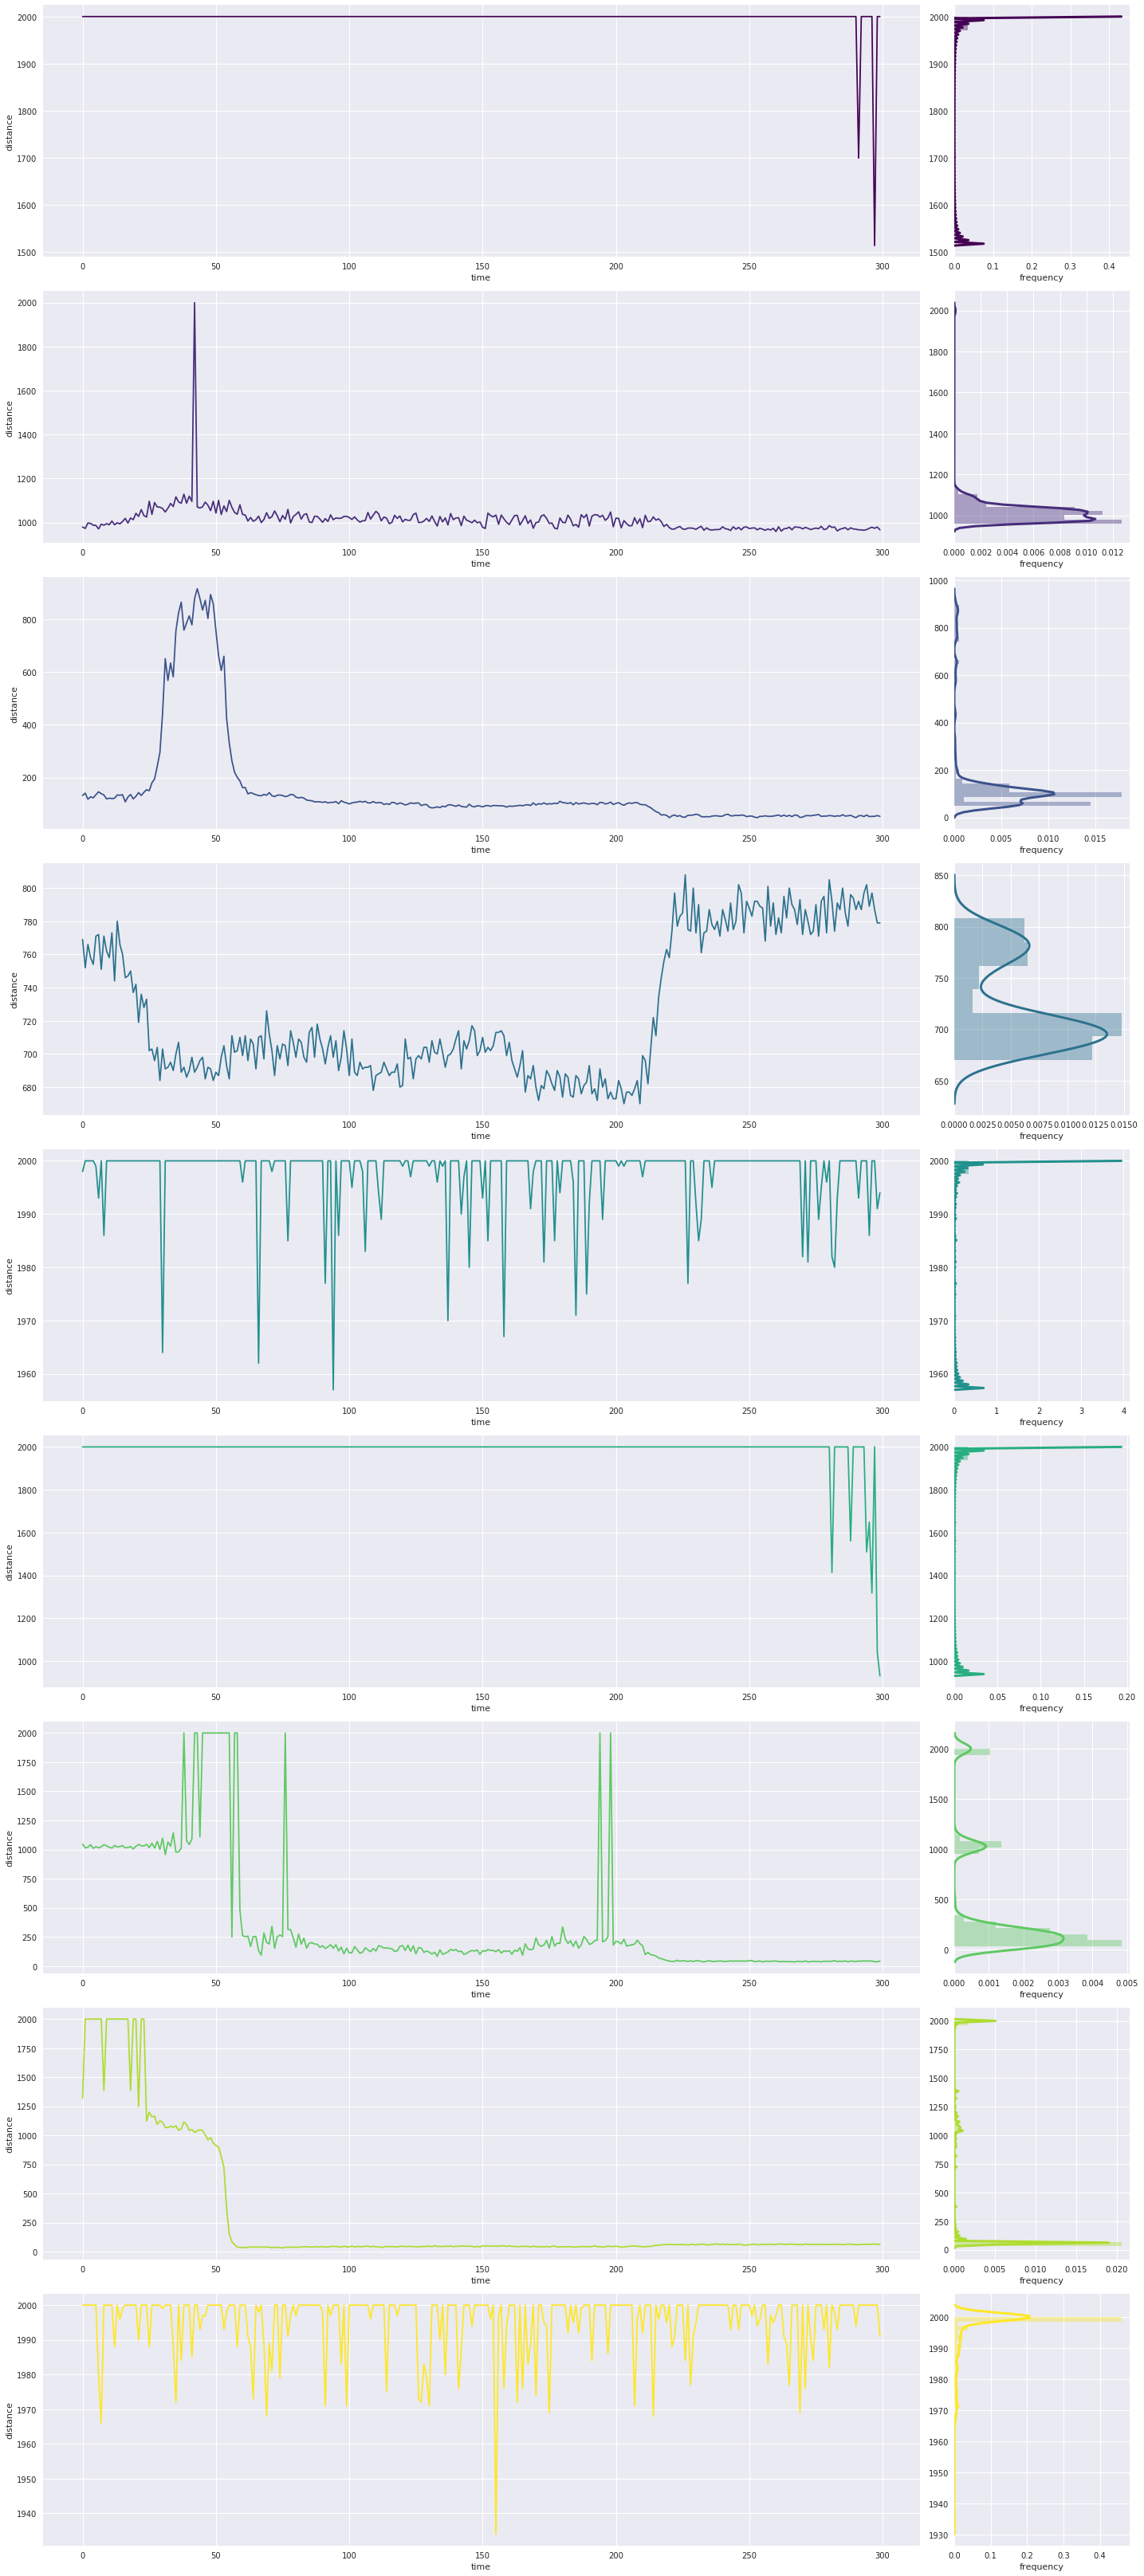

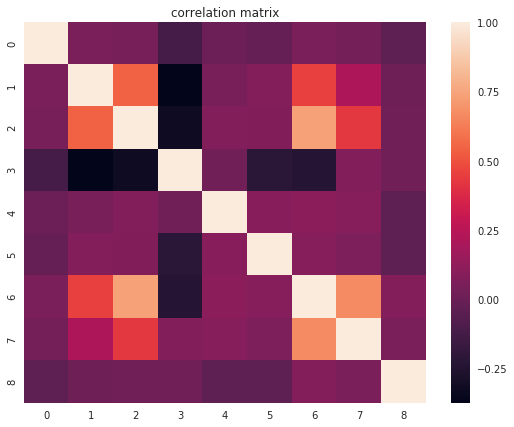

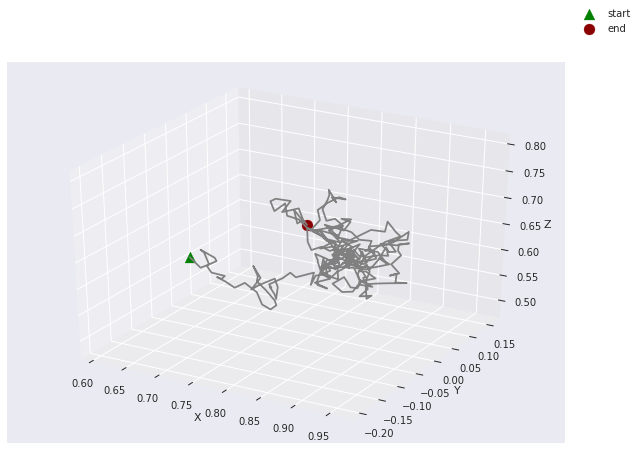

(300, 9) (300, 3)


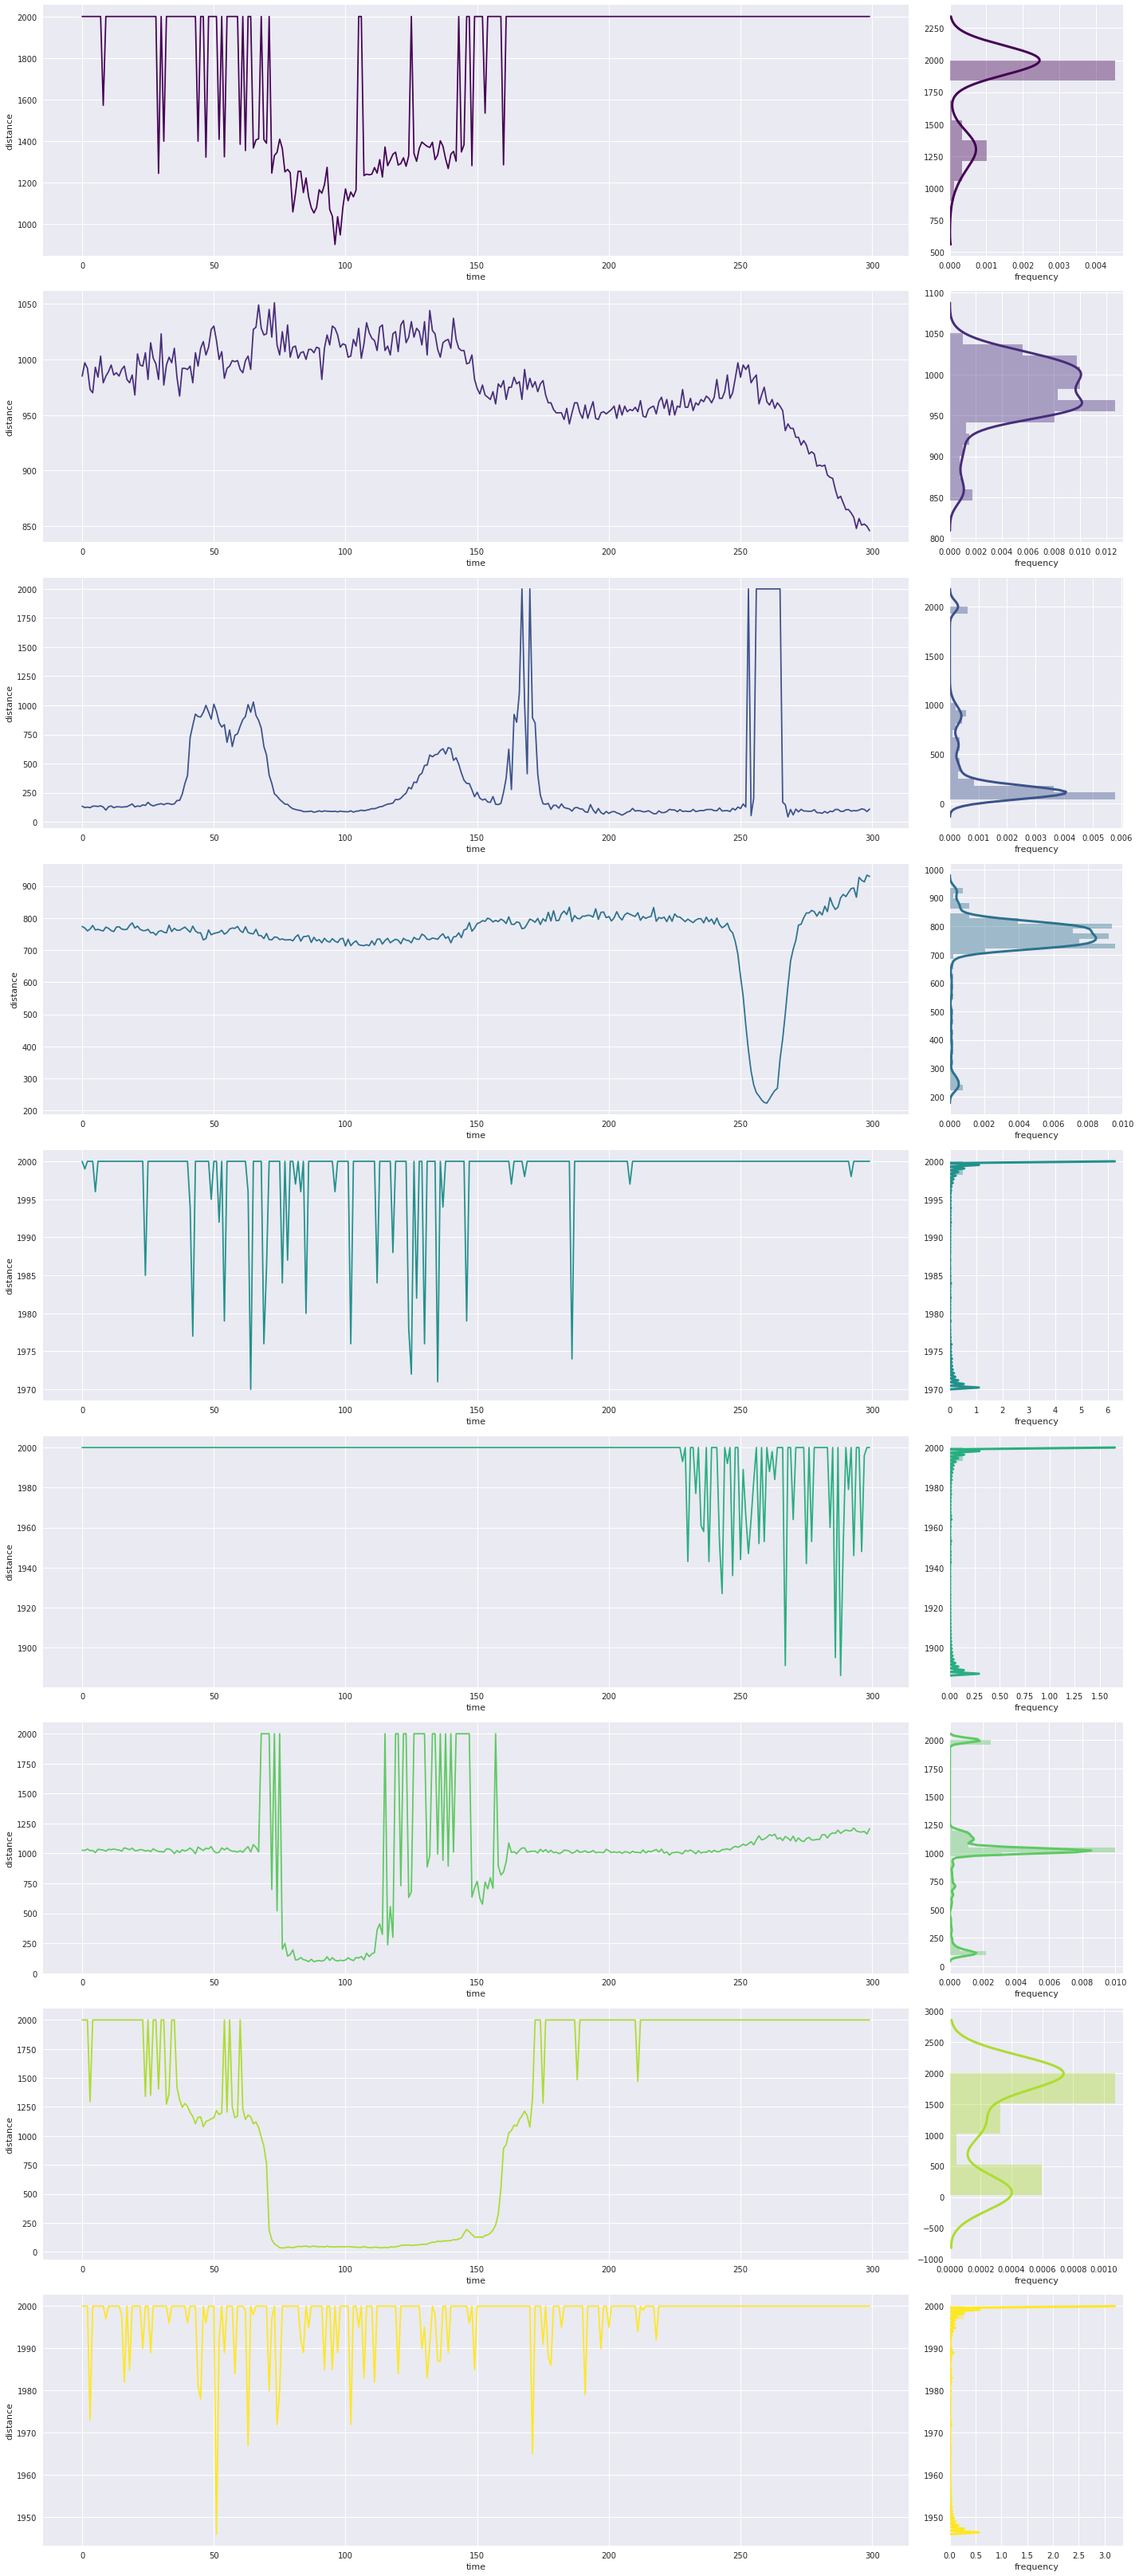

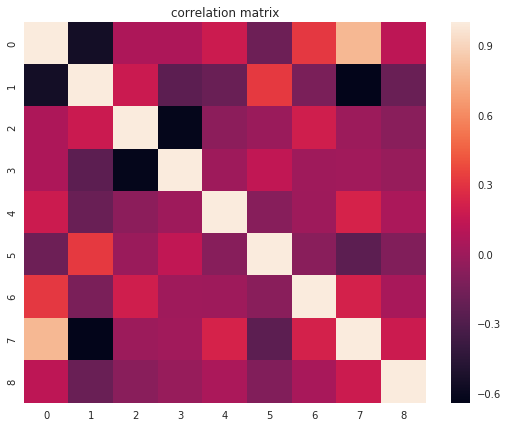

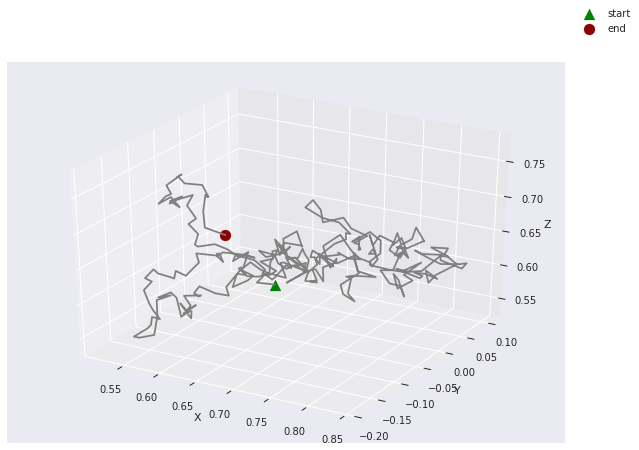

In [55]:
### SAVE ALL
num_trajectories = 10
for idx_trajectory in range(10):
    raw = np.load('random_data/lidar_{}.npy'.format(idx_trajectory))
    num_samples, num_channels = raw.shape
    X = raw[:, :]
    # clip to min and max
    X[X >= max_depth] = max_depth
    X[X <= min_depth] = min_depth
    t = np.arange(num_samples)
    trajectory = np.load('random_data/trajectory{}.npy'.format(idx_trajectory))
    print(X.shape, trajectory.shape)
    draw_jointplot(X, out_path='experiments/03_visualize_channels', name=idx_trajectory)
    draw_corr_matrix(X, out_path='experiments/03_visualize_channels', name=idx_trajectory)
    draw_trajectory(trajectory, out_path='experiments/03_visualize_channels', name=idx_trajectory)